# Ecoli only on Maltose

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['pf_acetate', 'pf_4HB', 'pf_stationary'] phenotypes were removed since their species is not among those that are defined with data: ['ecoli'].
The ['C2', 'C12', 'G3'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'D2', 'D12', 'E2', 'E12', 'F2', 'F12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the OD measurements.
2022-07-08 19:09:07.878575
Done with biomass loop: 0.3580729166666667 min
Done with metabolites loop: 5.854427083333333 min
Done with the dbc & diffc loop: 0.6309895833333333 min
Done with loading the variables, constraints, and objective: 2.914322916666667 min
Done exporting the content: 0.5671875 min
2022-07-08 19:19:30.484844


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\RK2_midpoint\mscommfitting.py:446: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FeasibilityError: The solution is sub-optimal, with a infeasible status.

growth: 100 objective value: 49.36109664953572 




2022-07-08 19:59:36.760976


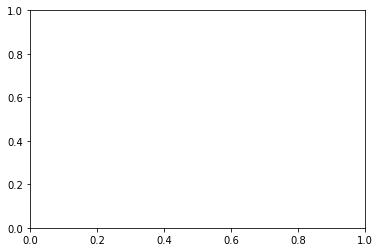

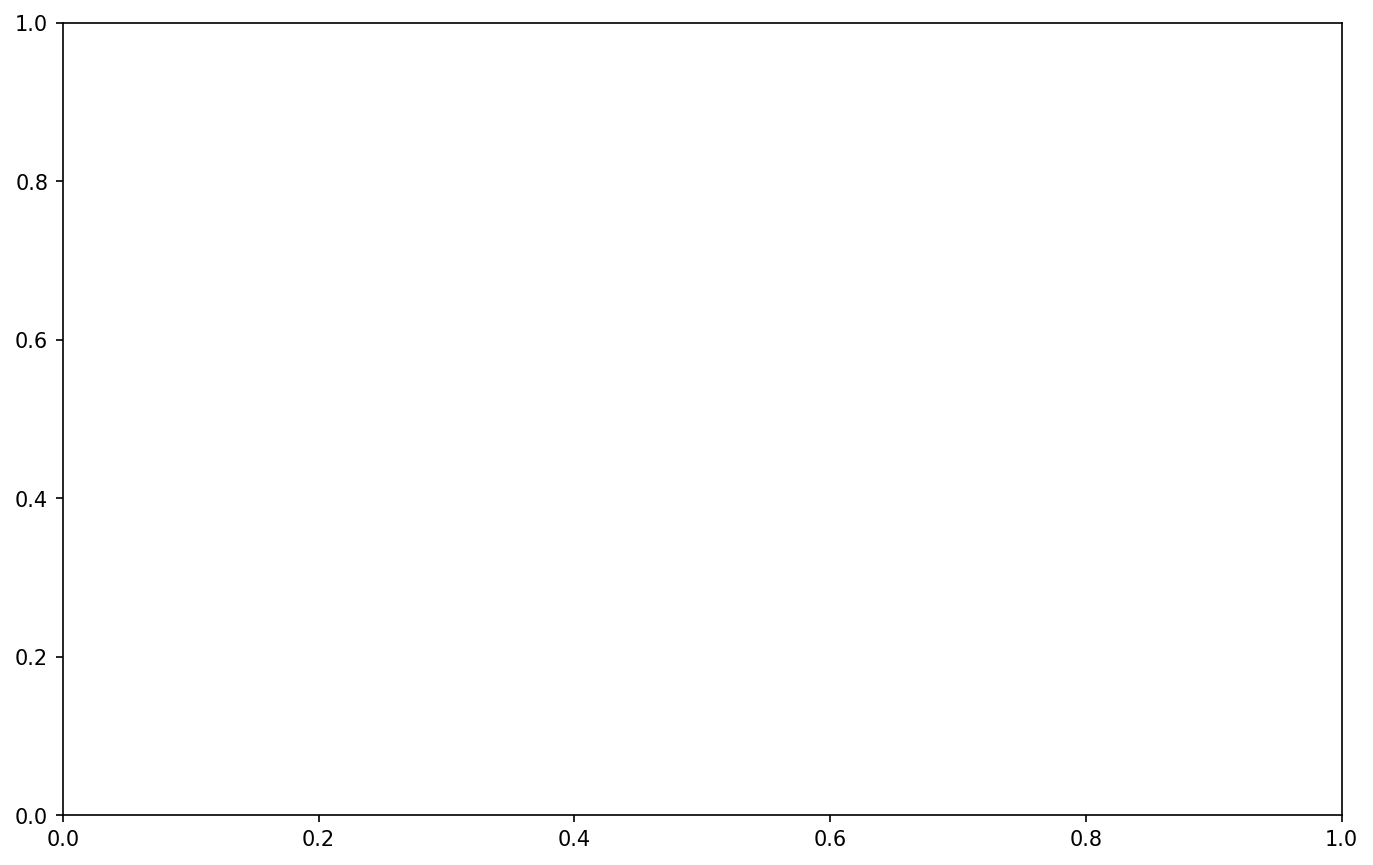

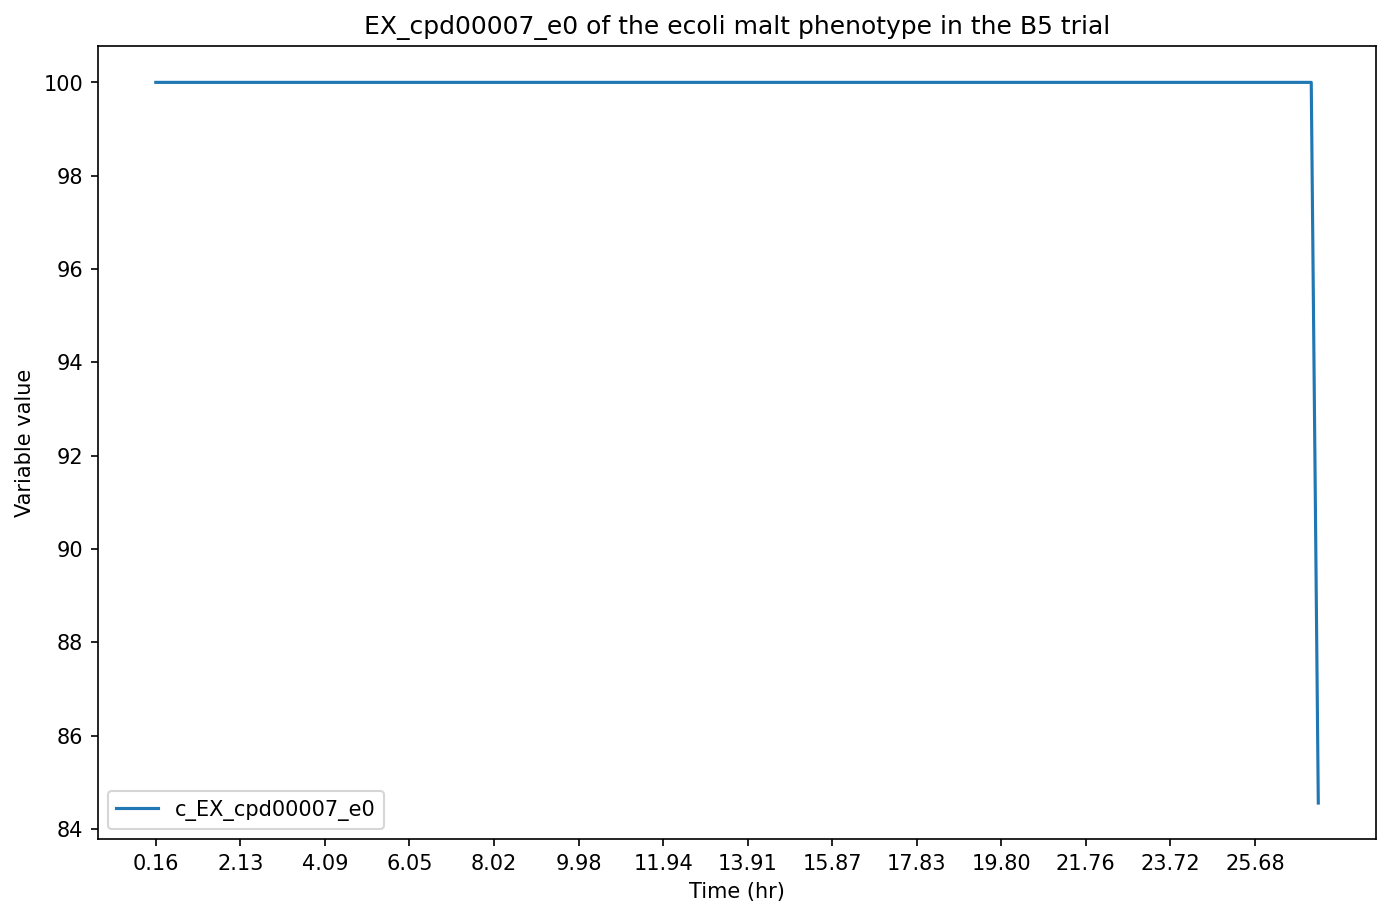

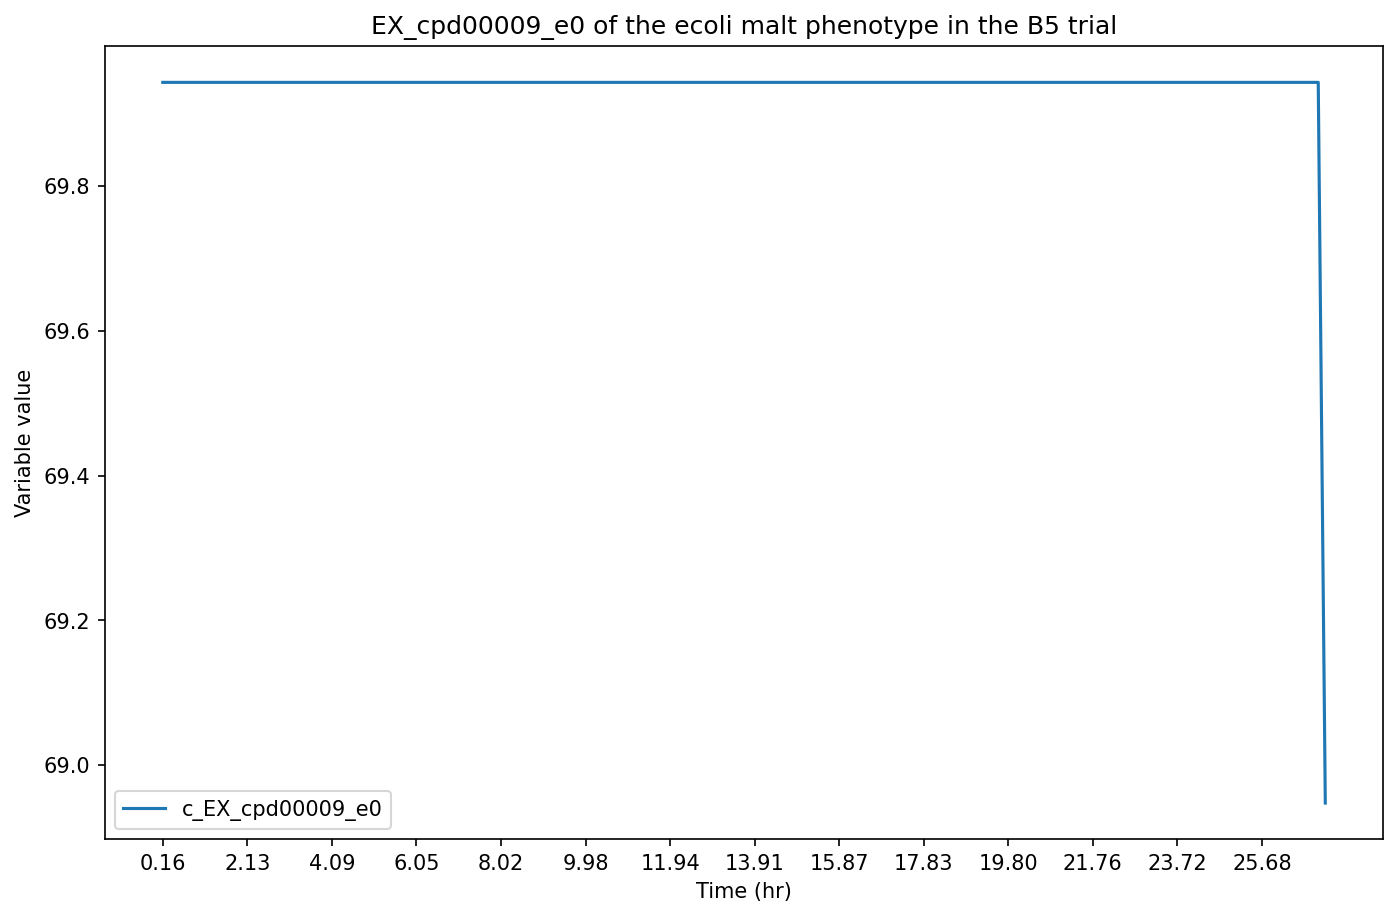

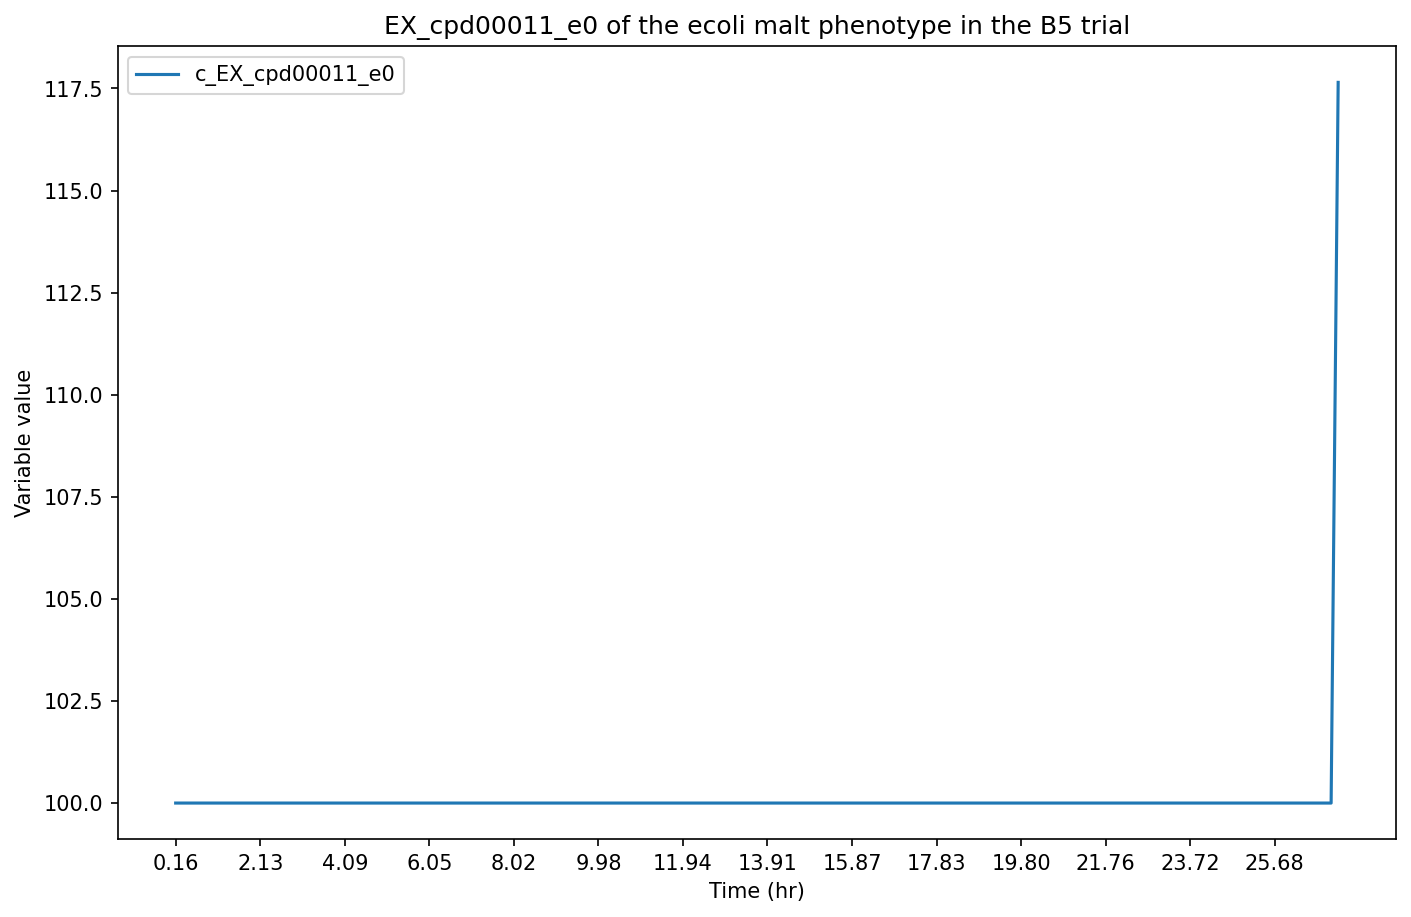

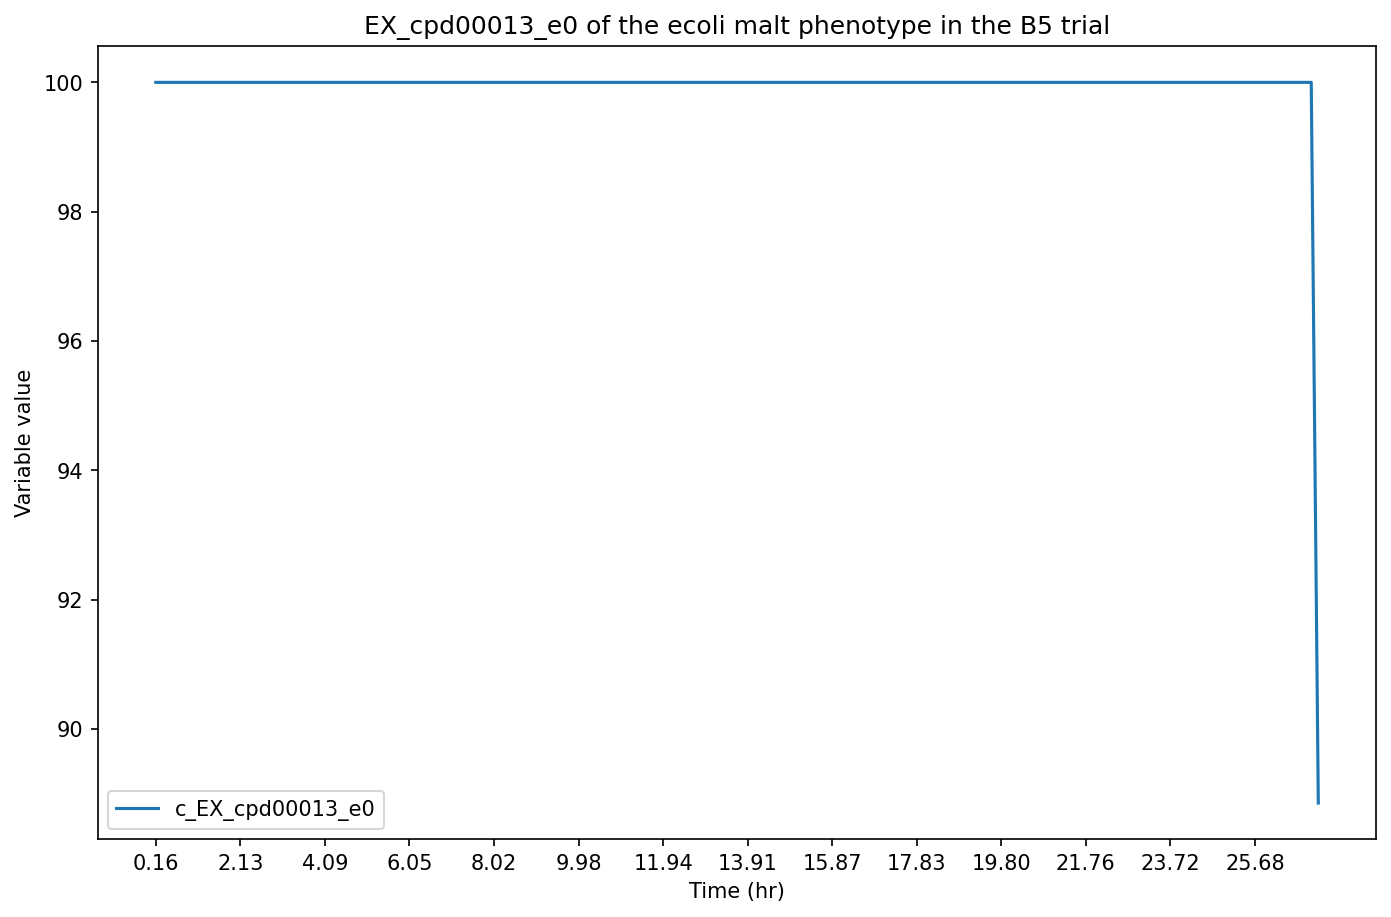

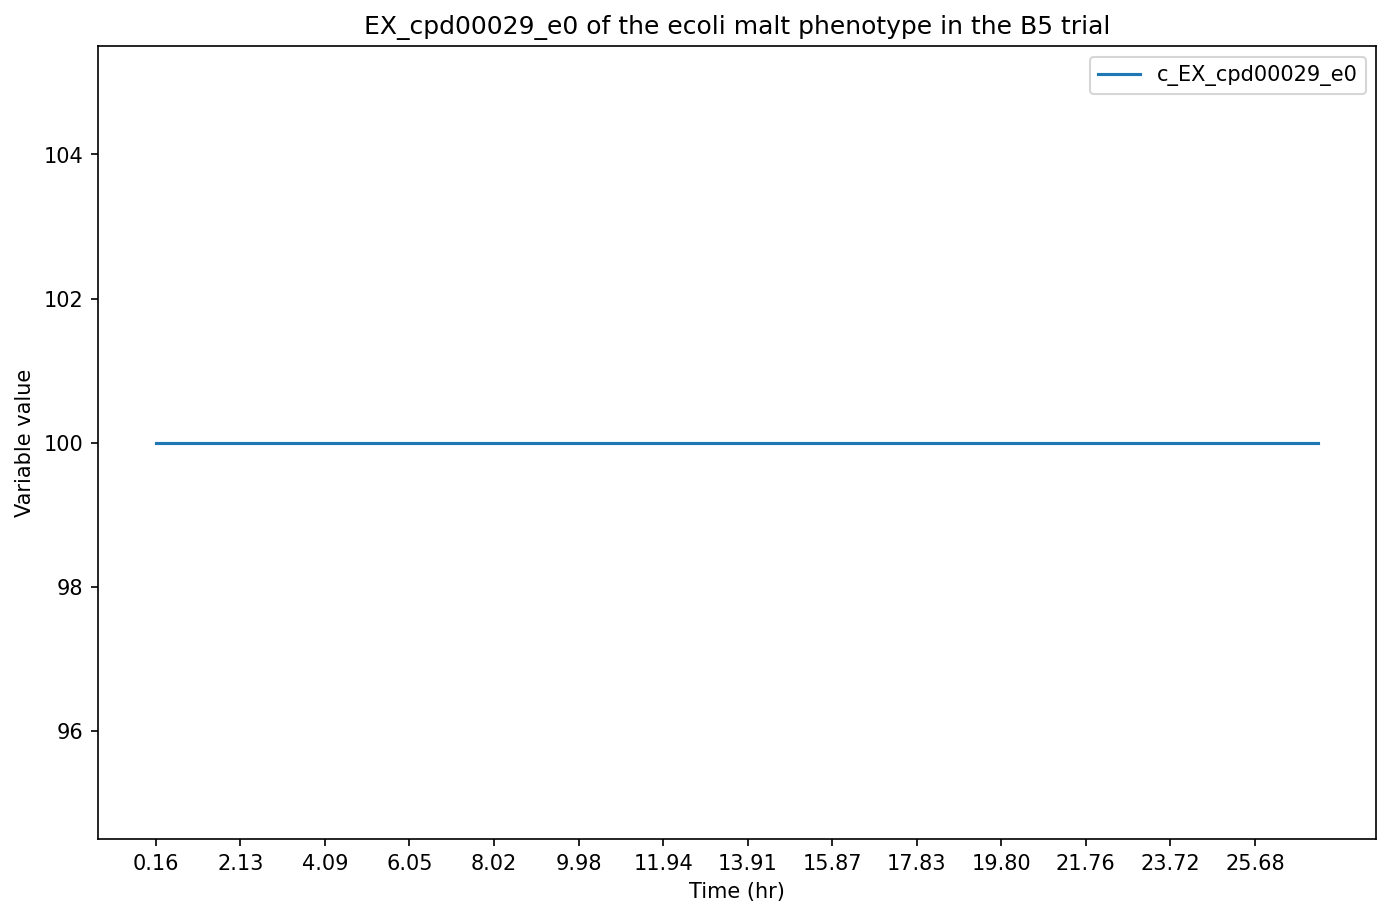

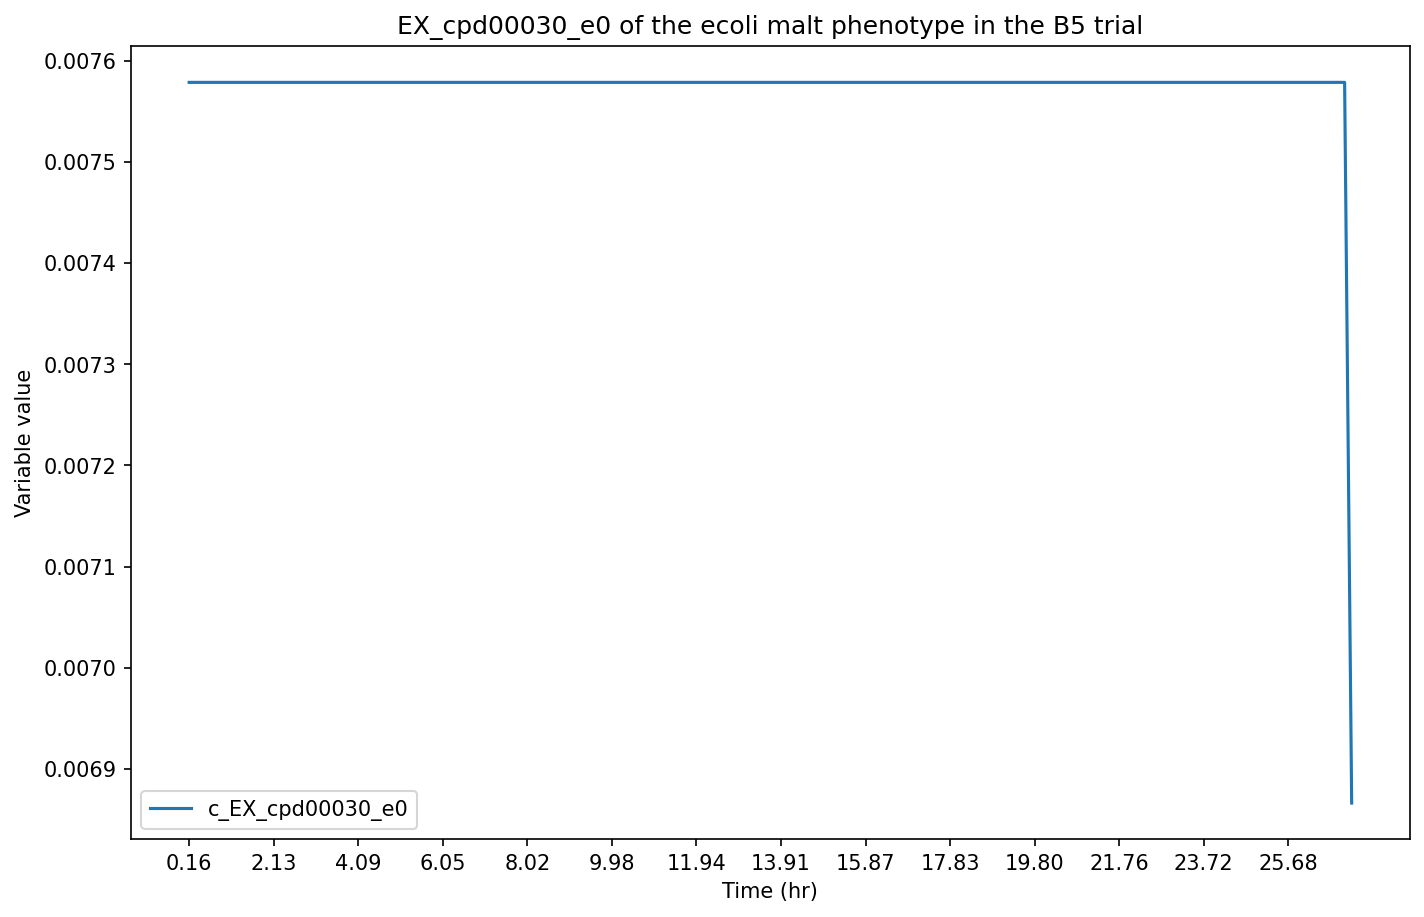

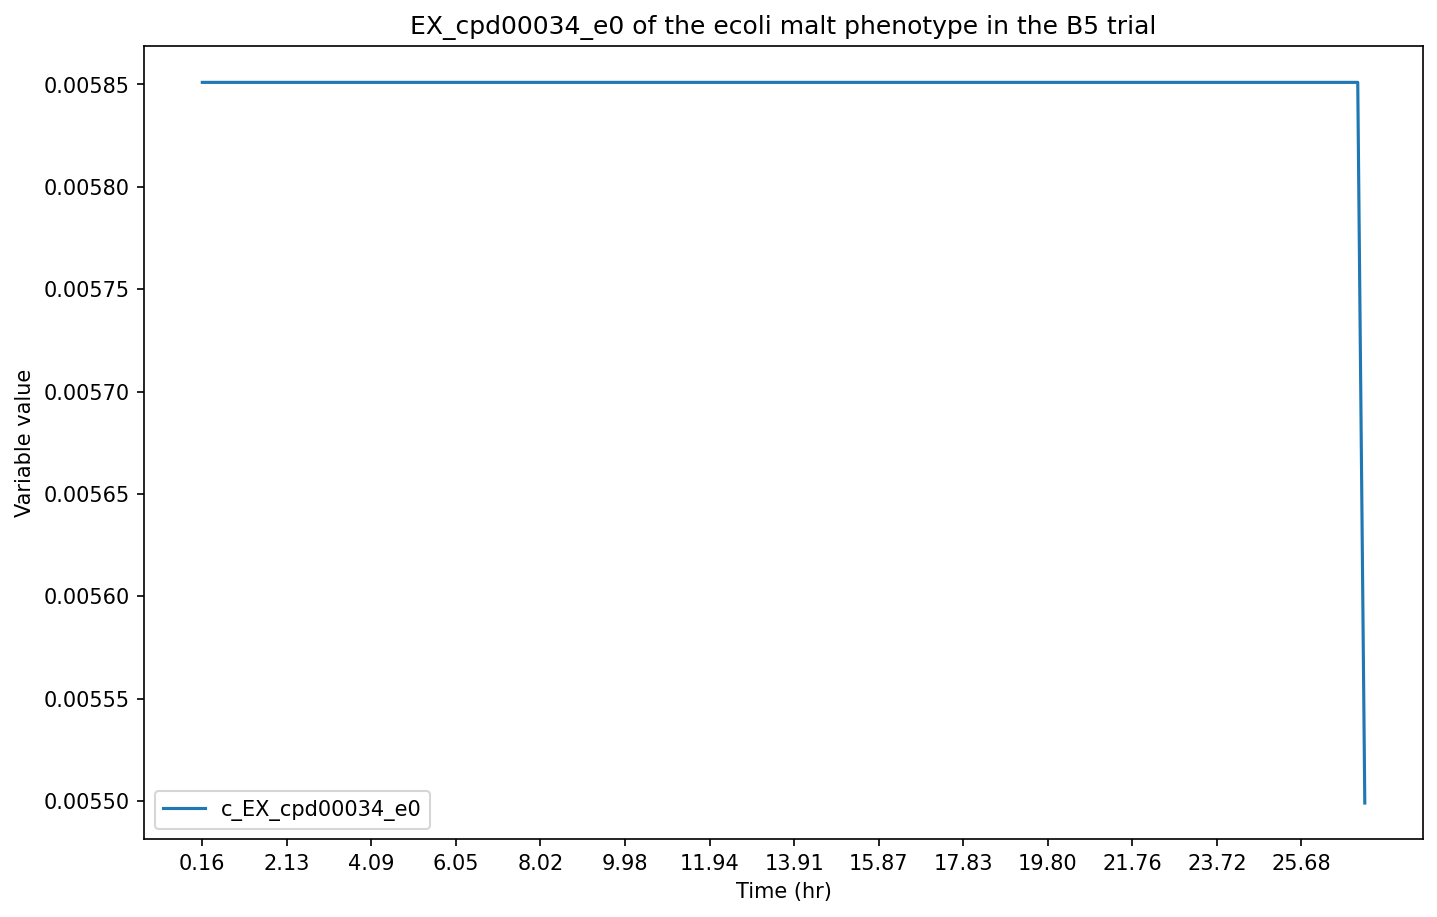

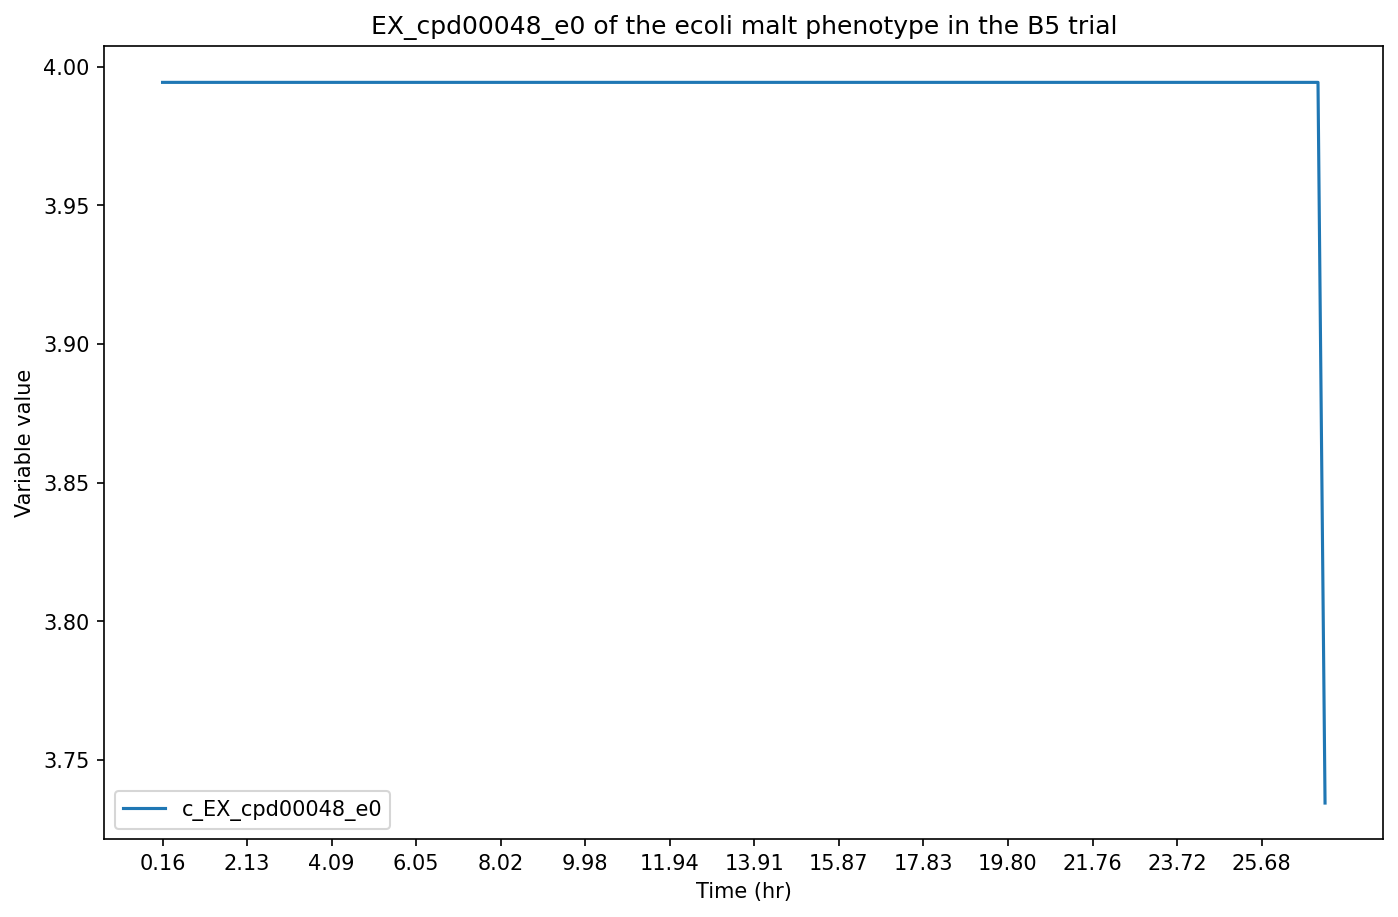

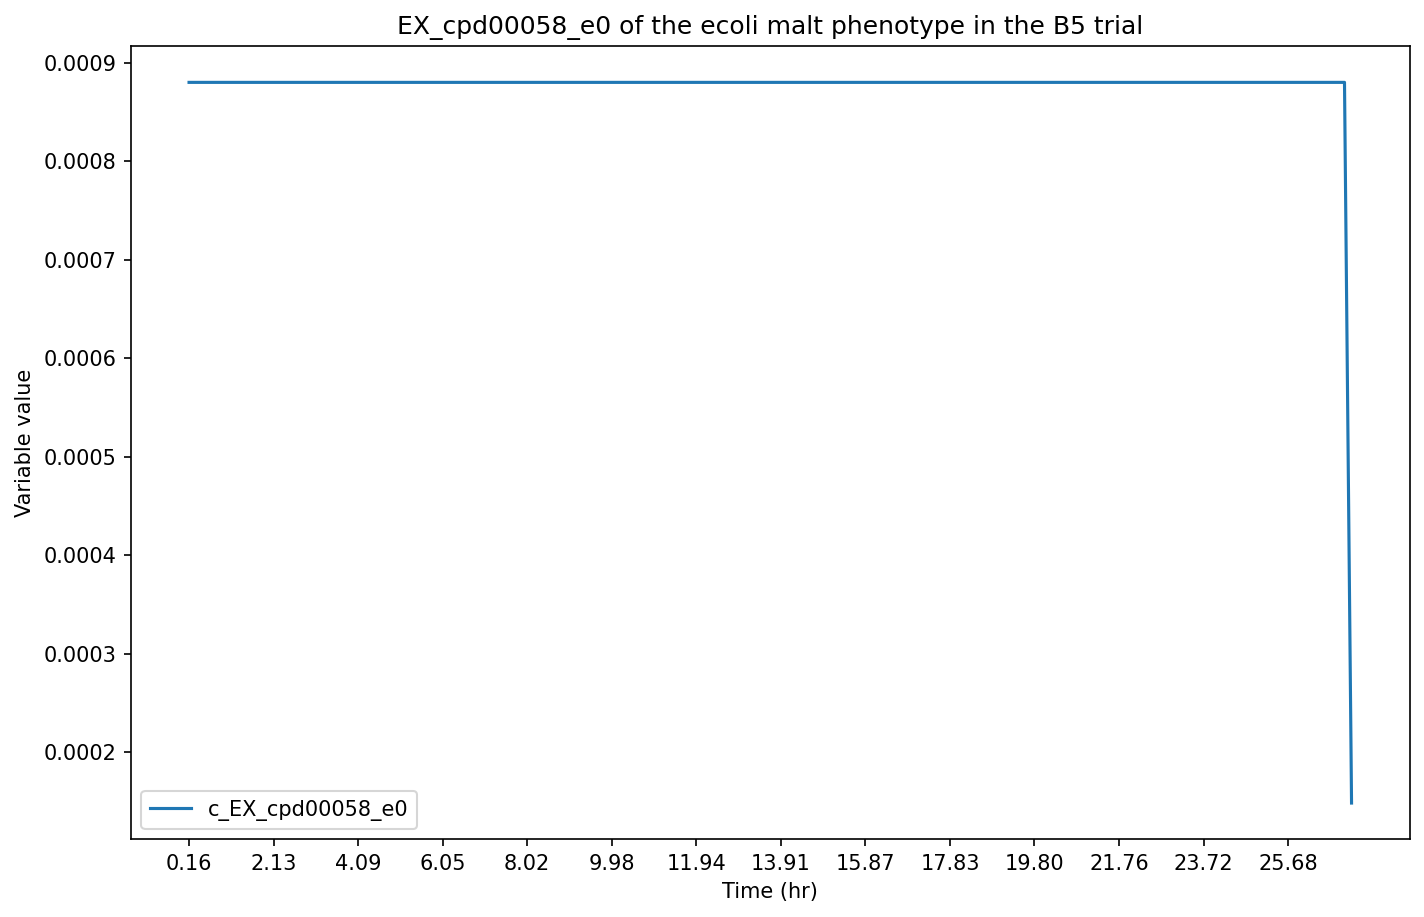

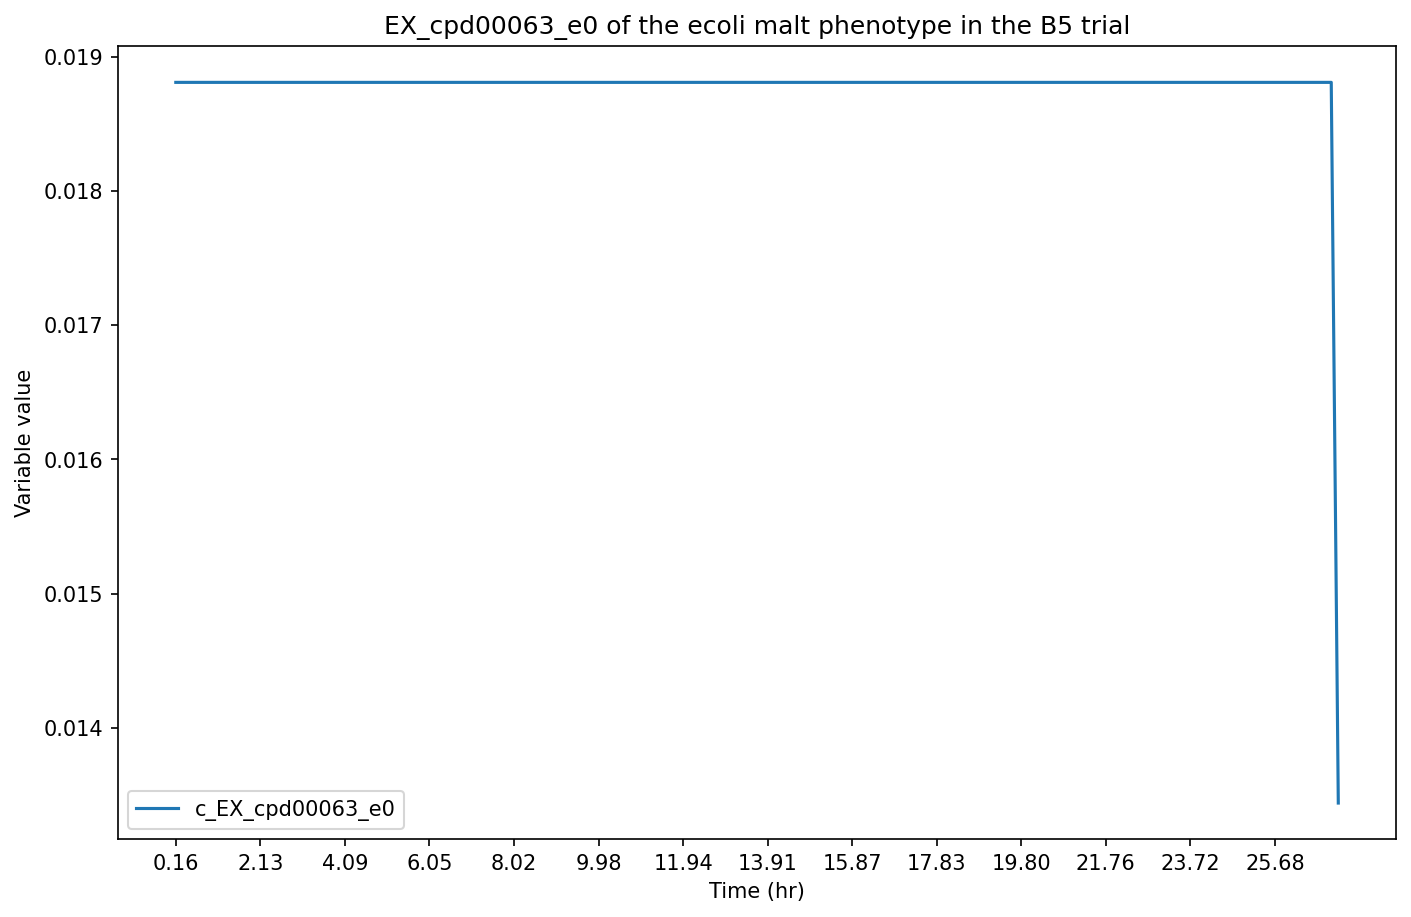

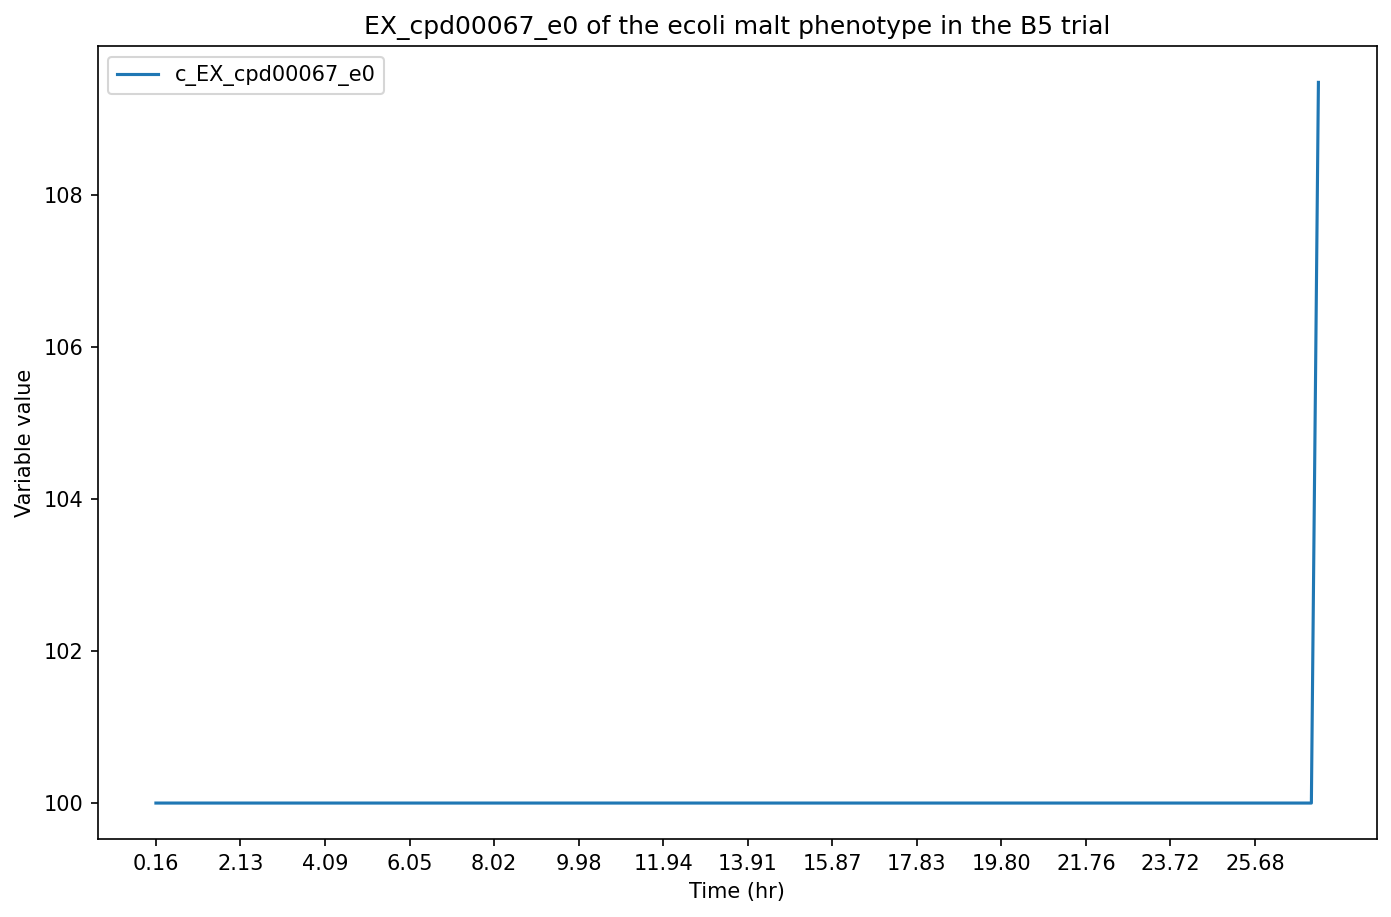

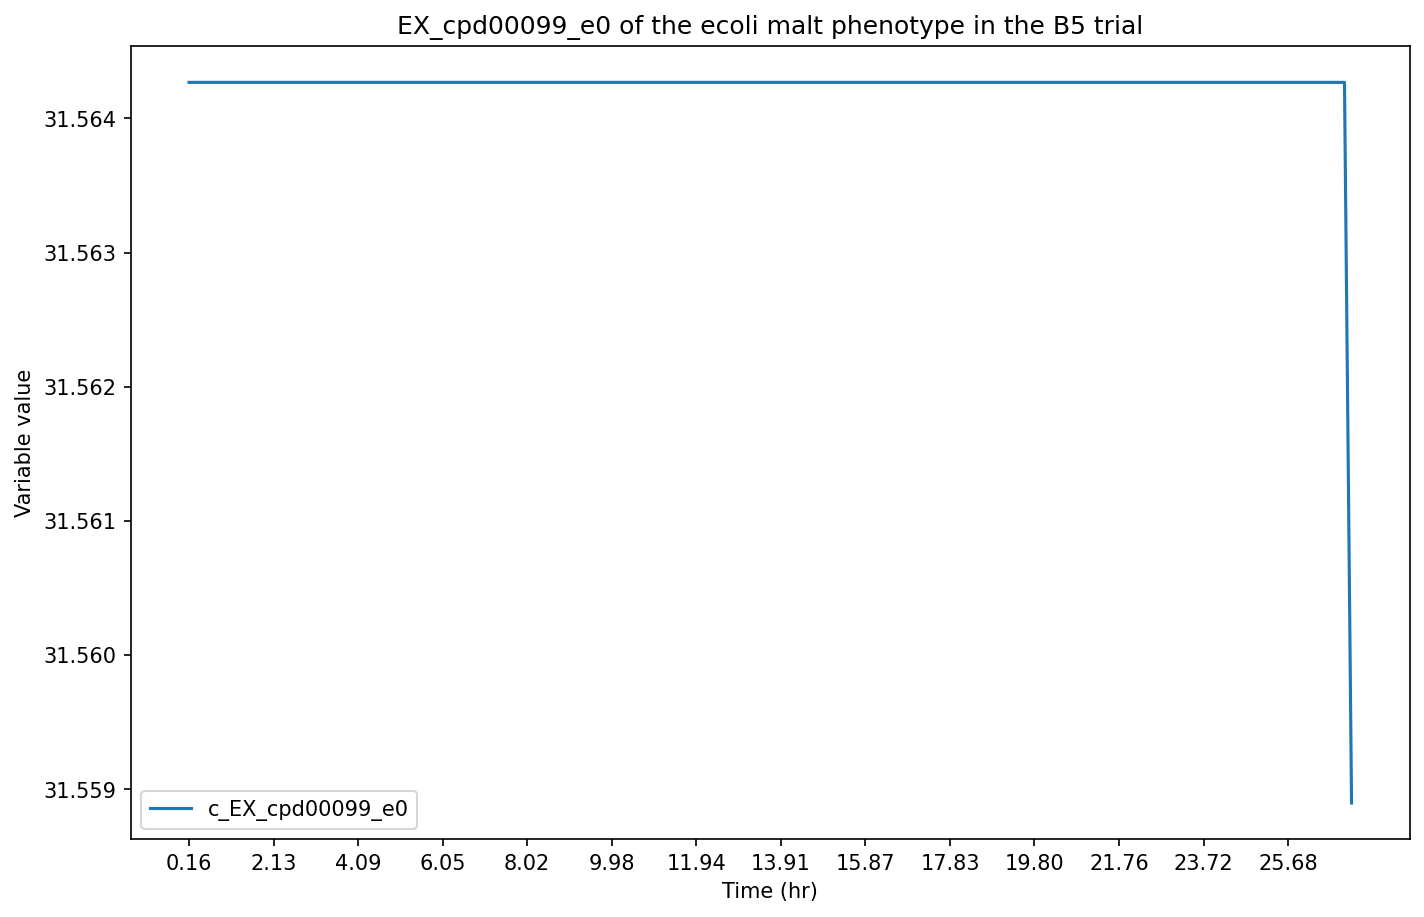

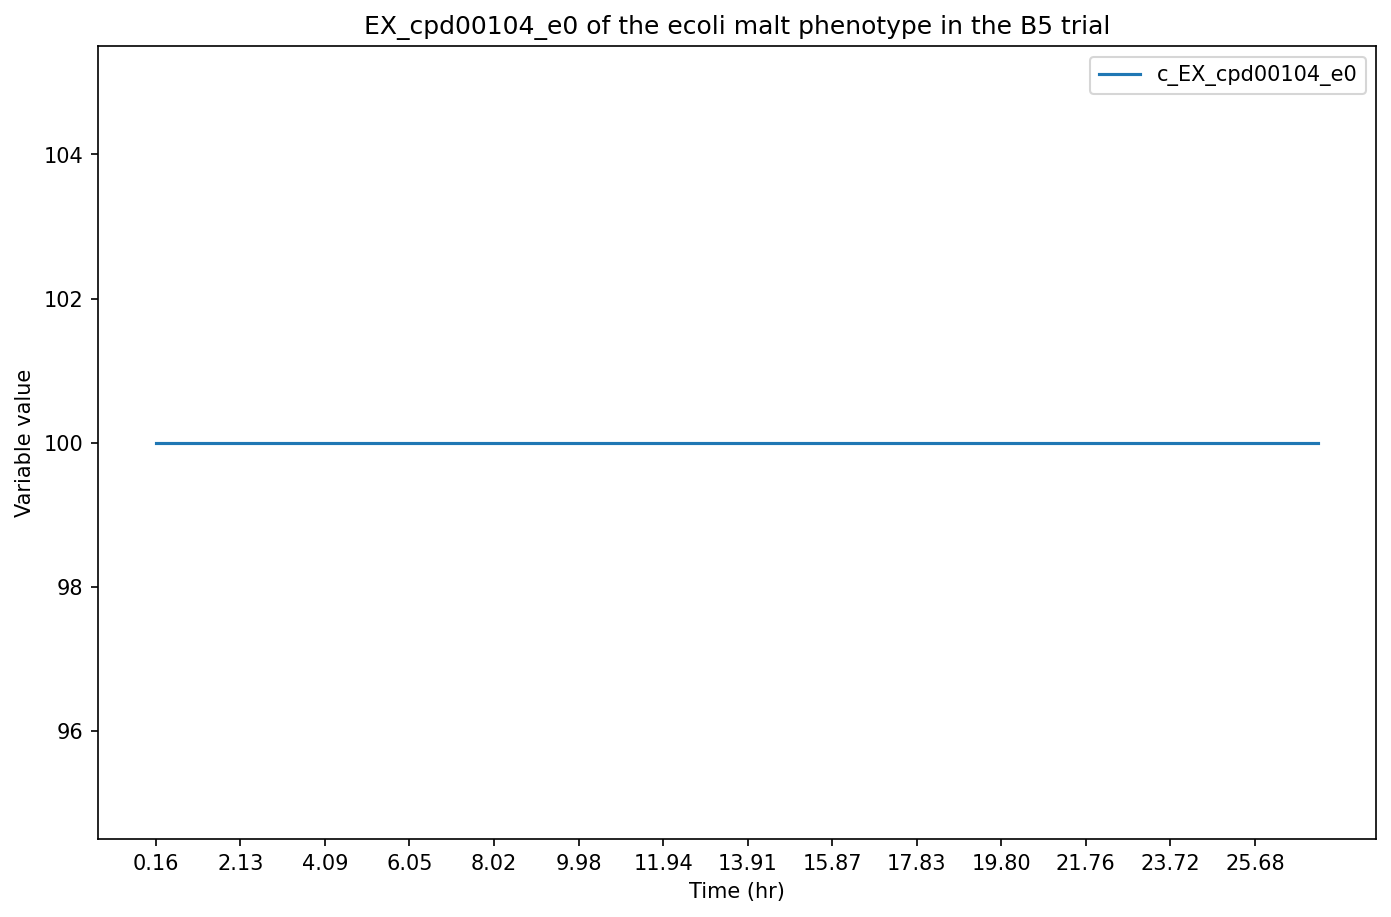

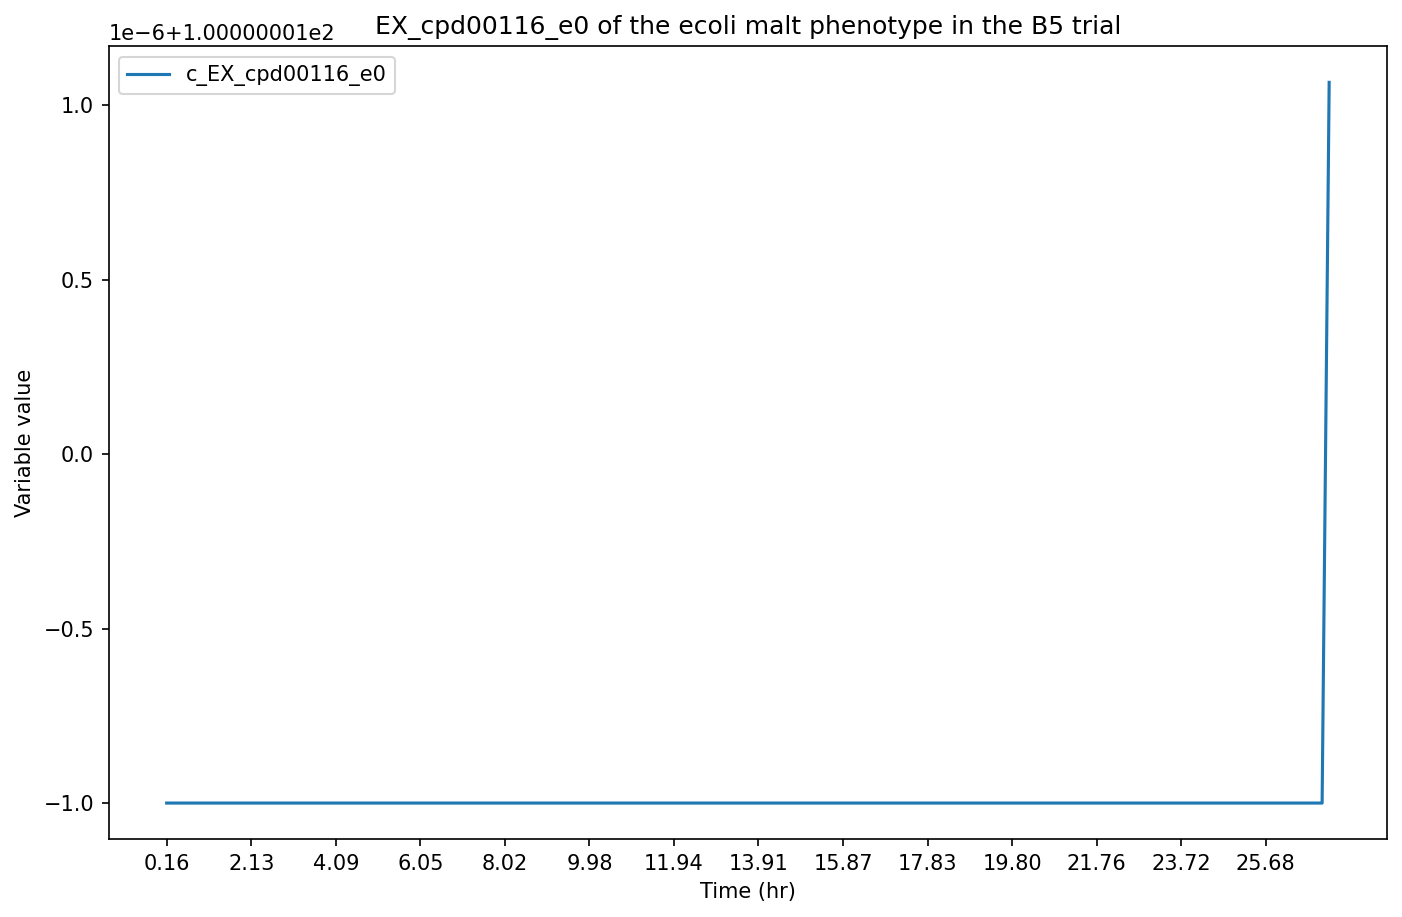

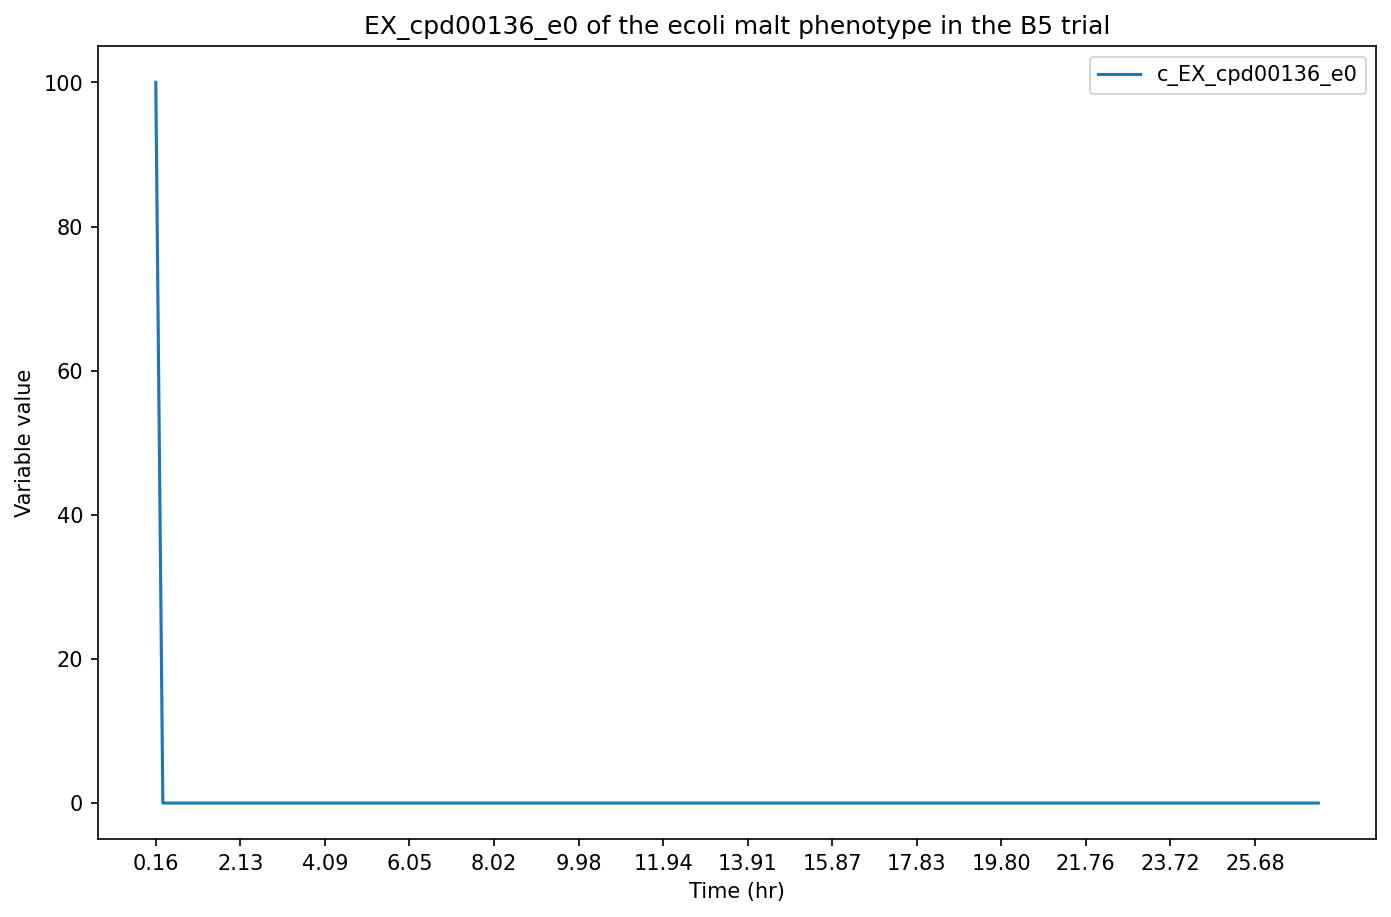

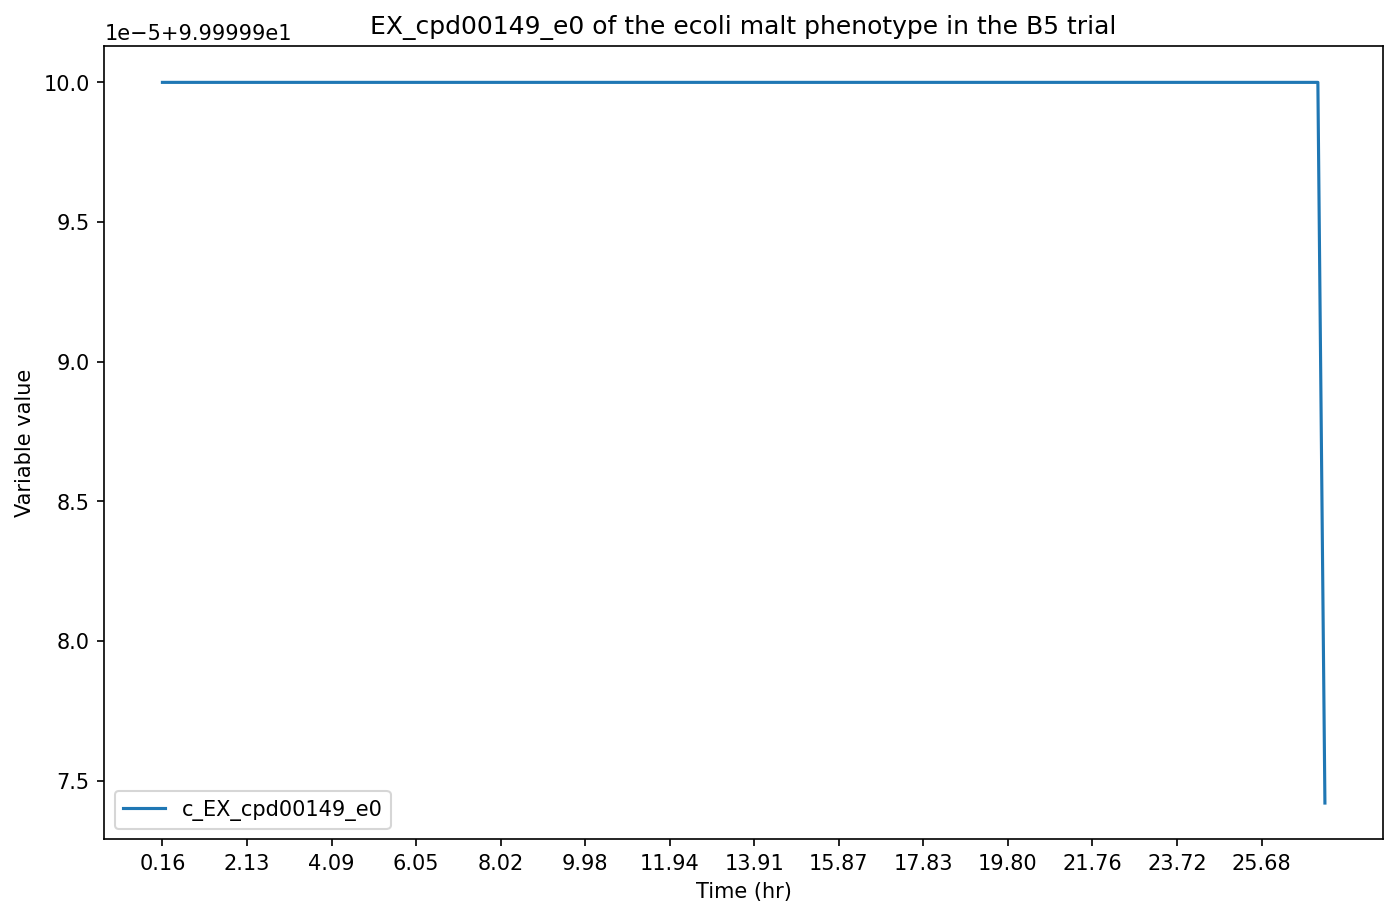

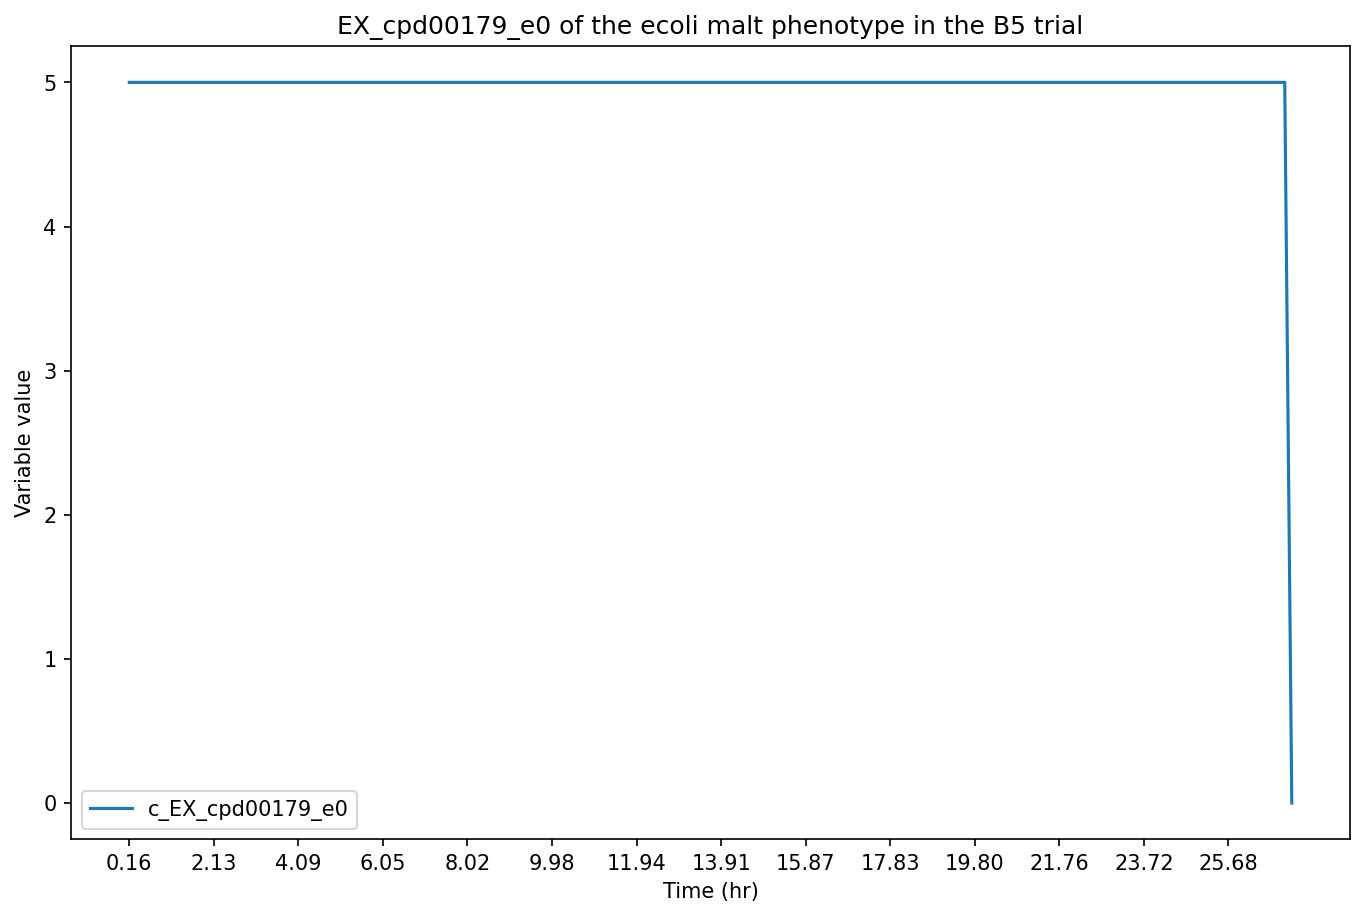

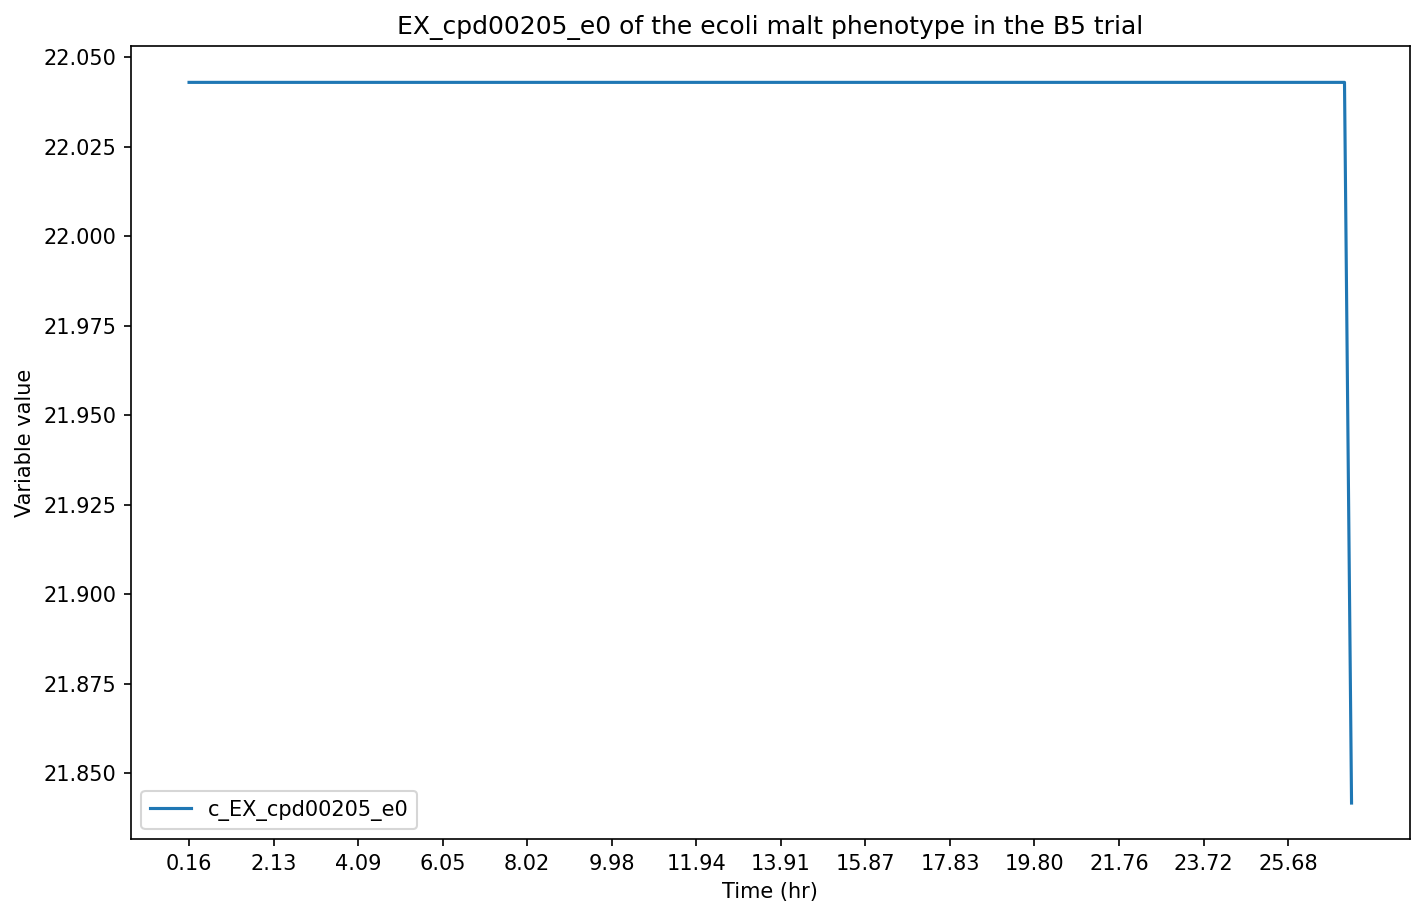

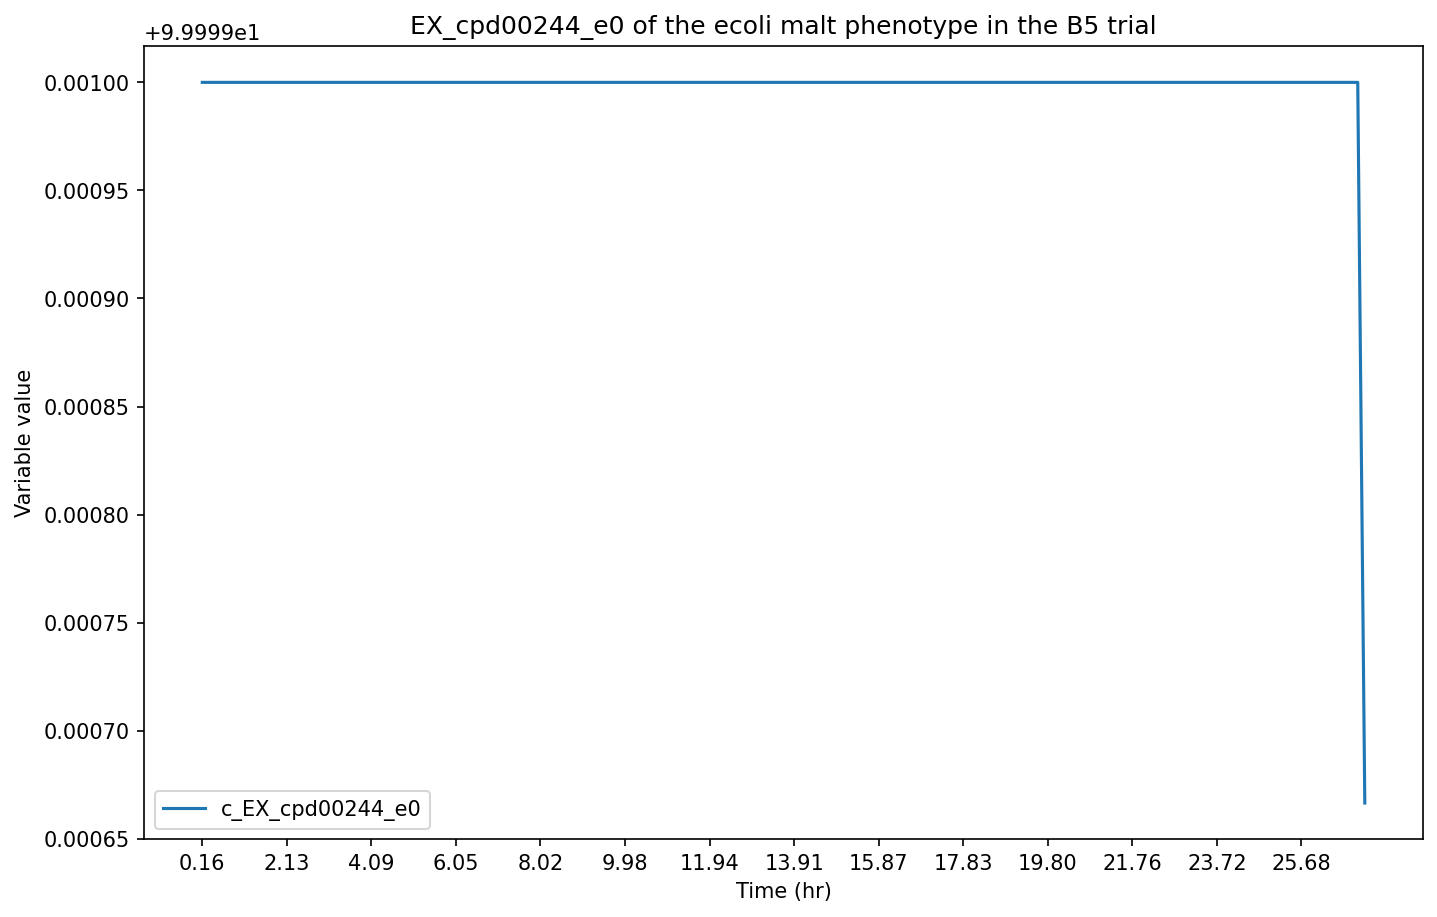

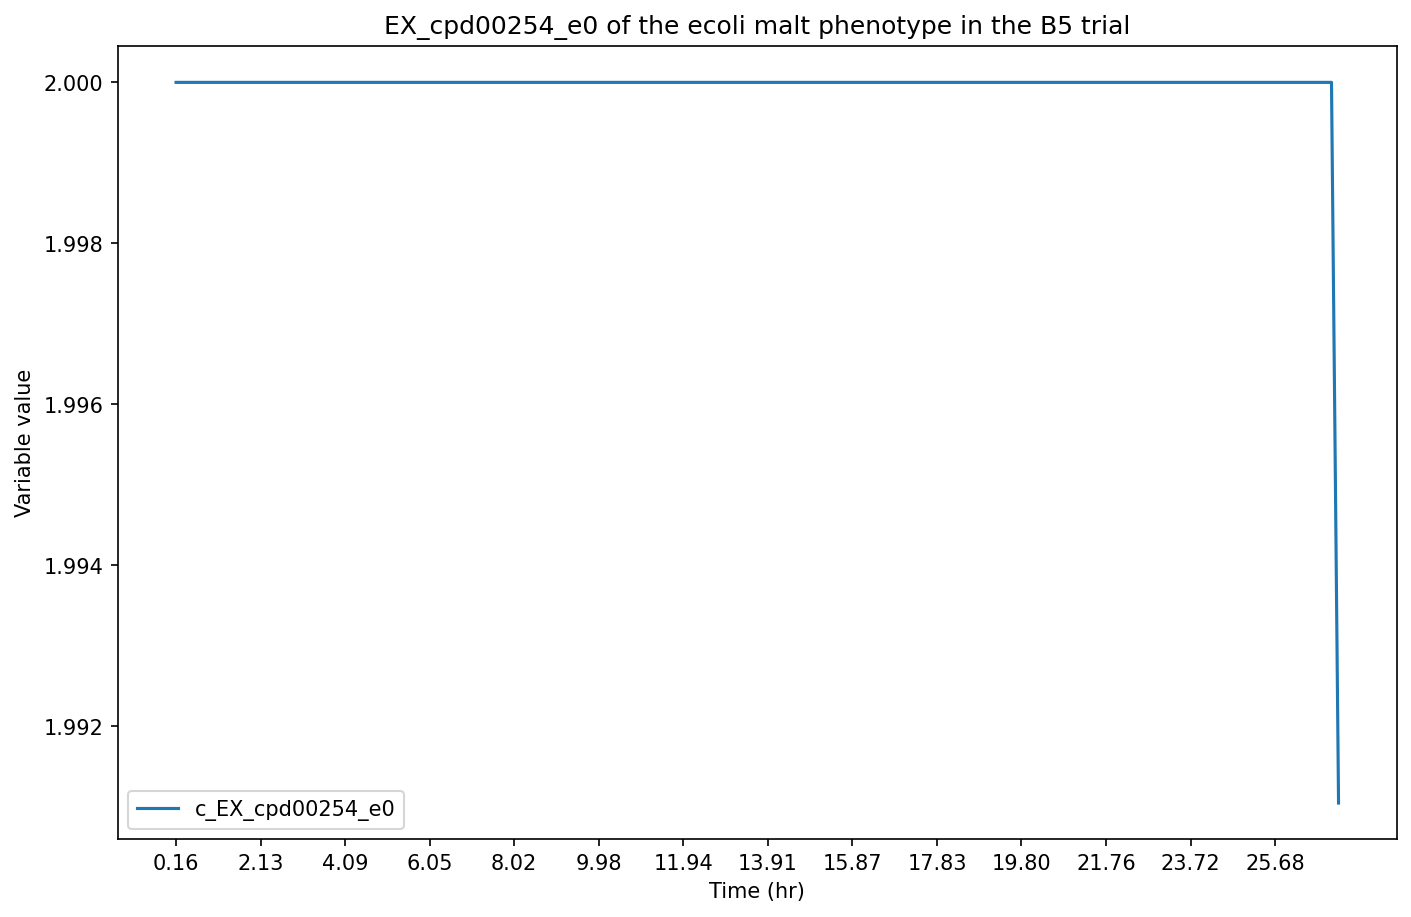

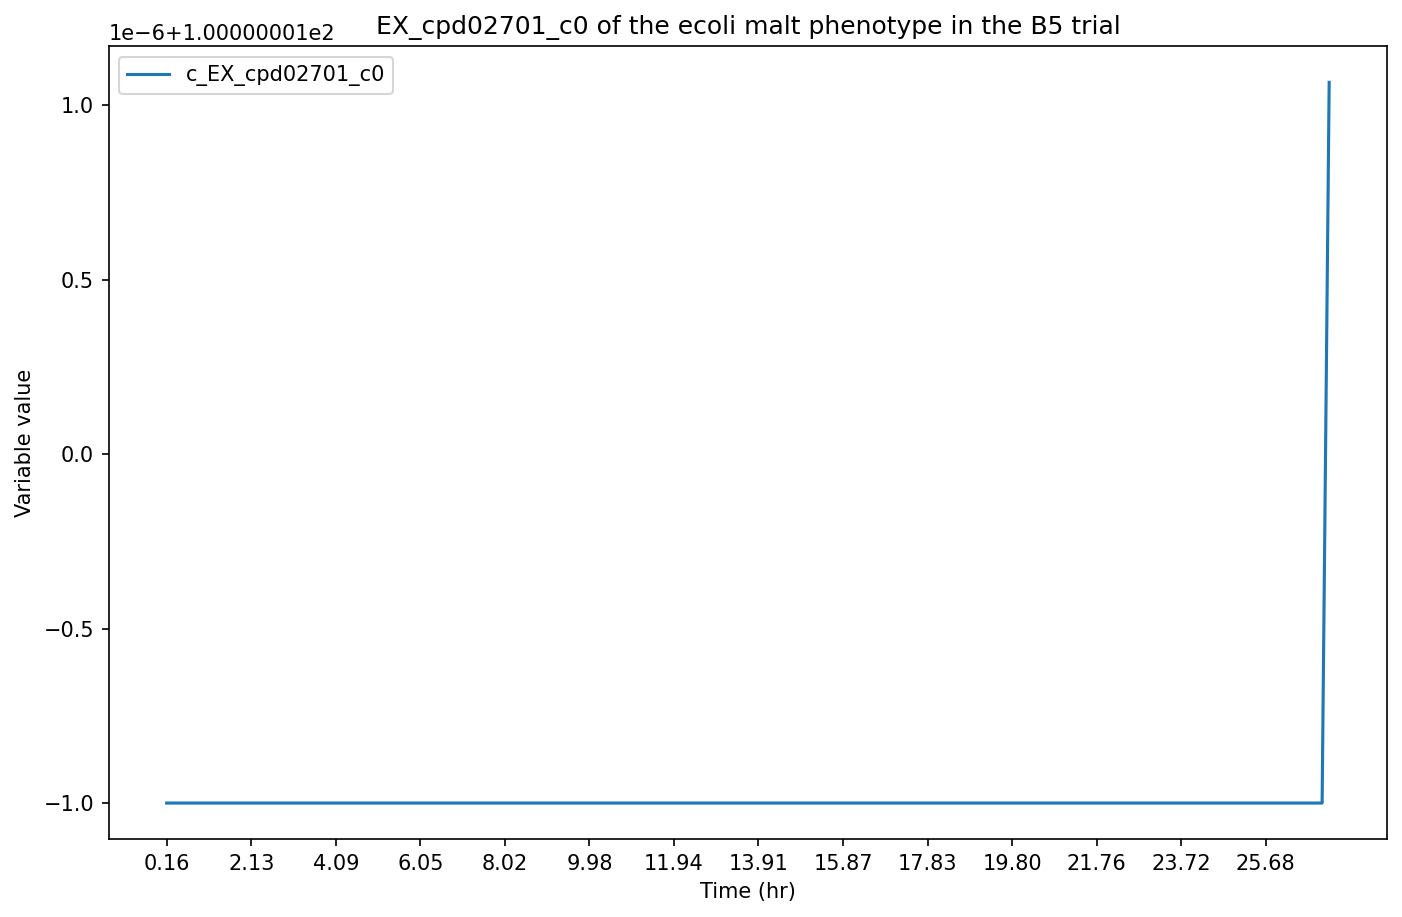

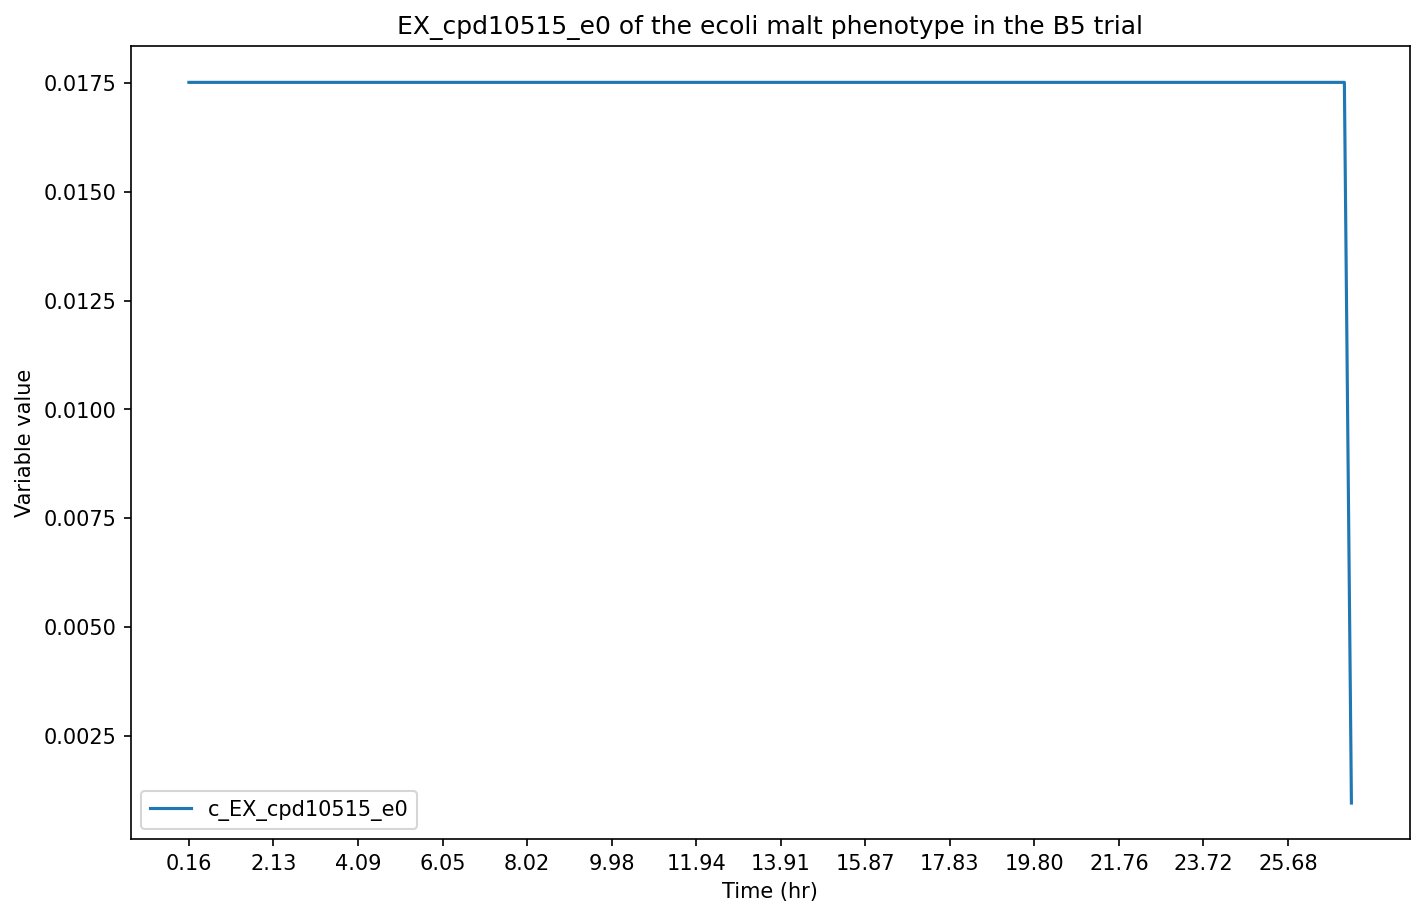

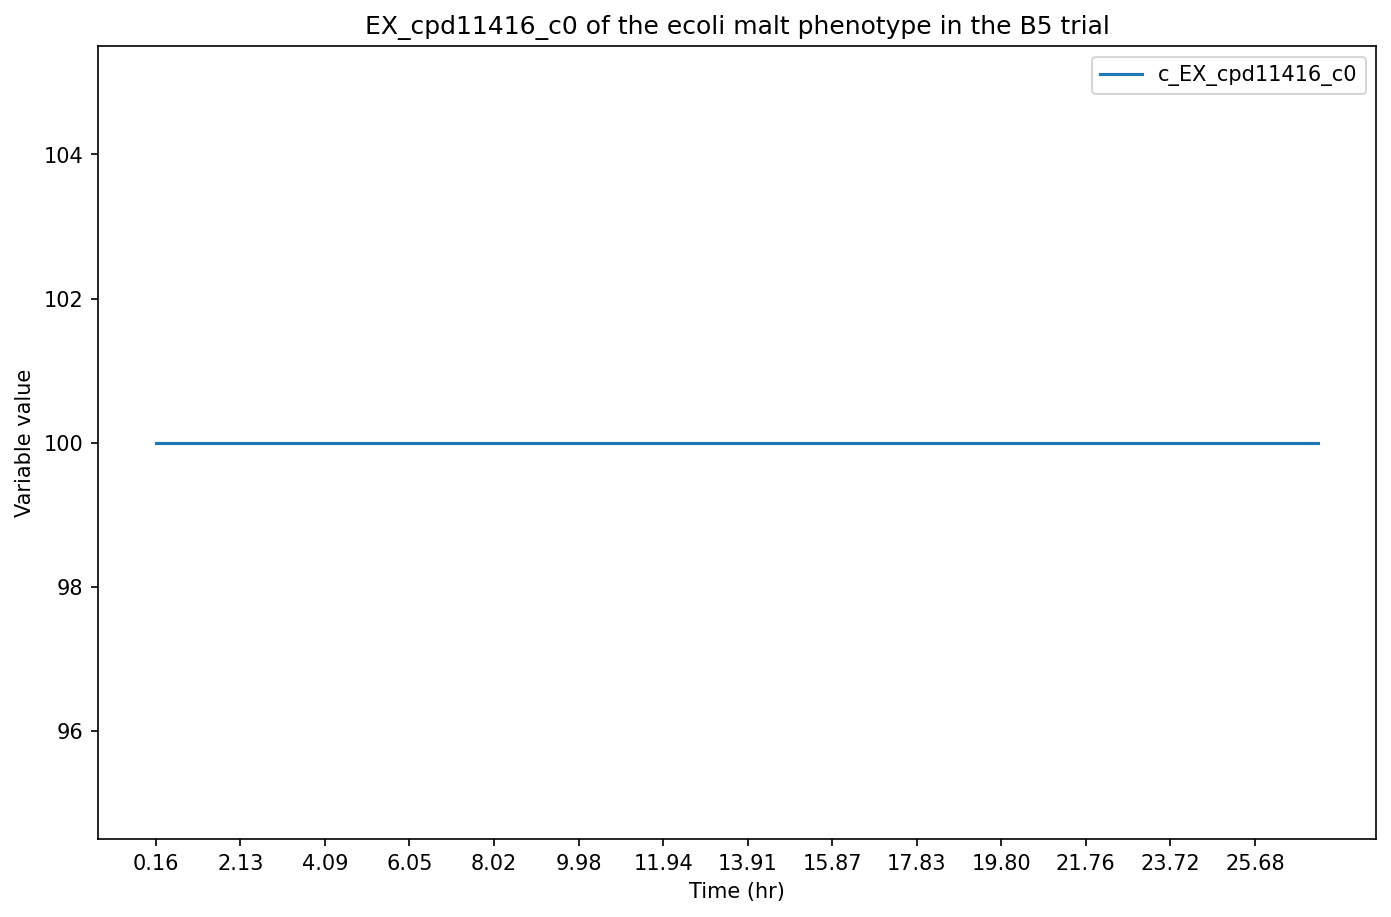

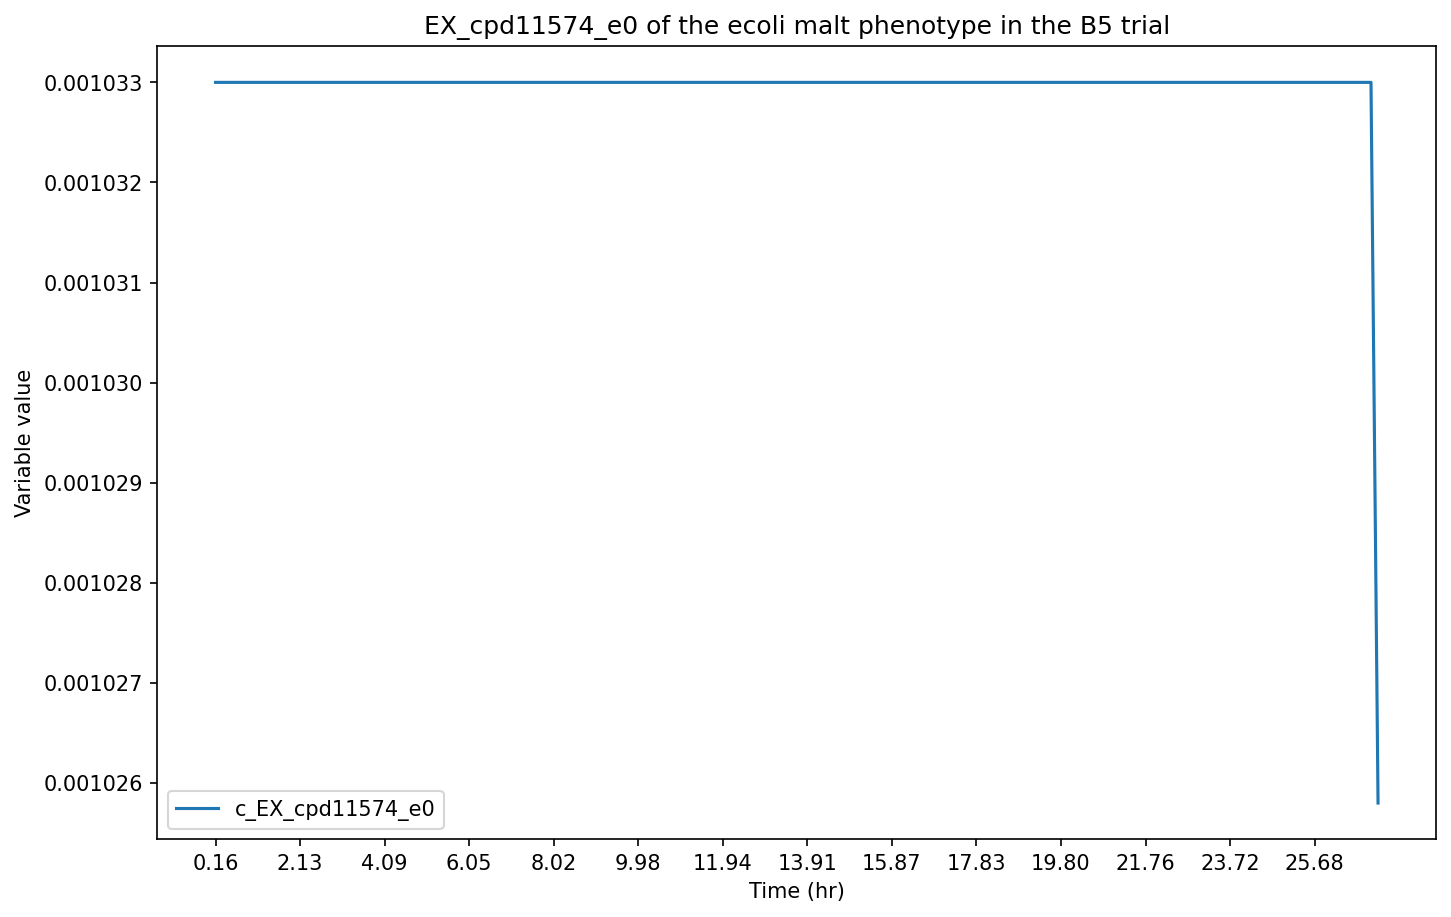

In [1]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
# from mscommfitting import MSCommFitting
# os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose')
%run ../mscommfitting.py
with ZipFile('msComFit.zip', 'r') as zp:
    zp.extractall()
fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
for metabolite in fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B5',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           unzip_contents=True)
print(datetime.today())
mscommfit2.define_problem(parameters={
    'v':100,
    'cvmin': 0.5,
    'bcv': 0.5
    }, zip_contents=True)
print(datetime.today())
%time mscommfit2.compute(graphs)
print('growth:', mscommfit2.parameters['v'], 'objective value:', mscommfit2.problem.objective.value, '\n\n\n\n')
print(datetime.today())

# Full community

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The [] phenotypes were removed since their species is not among those that are defined with data: ['ecoli', 'pf'].
The ['C2', 'C12', 'G3'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'D2', 'D12', 'E2', 'E12', 'F2', 'F12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'D2', 'D12', 'E12', 'F12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the OD measurements.
2022-07-08 20:00:16.659635
Done with biomass loop: 0.7033854166666667 min
Done with metabolites loop: 11.866145833333333 min
Done with the dbc & diffc loop: 1.40390625 min
Done with loading the variables, constraints, and objective: 4.0364583333

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\RK2_midpoint\mscommfitting.py:451: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = pyplot.subplots()


The solution is optimal.
CPU times: total: 24min 53s
Wall time: 24min 53s
growth: 100 objective value: 43.640950385656396 




2022-07-08 20:43:59.323235


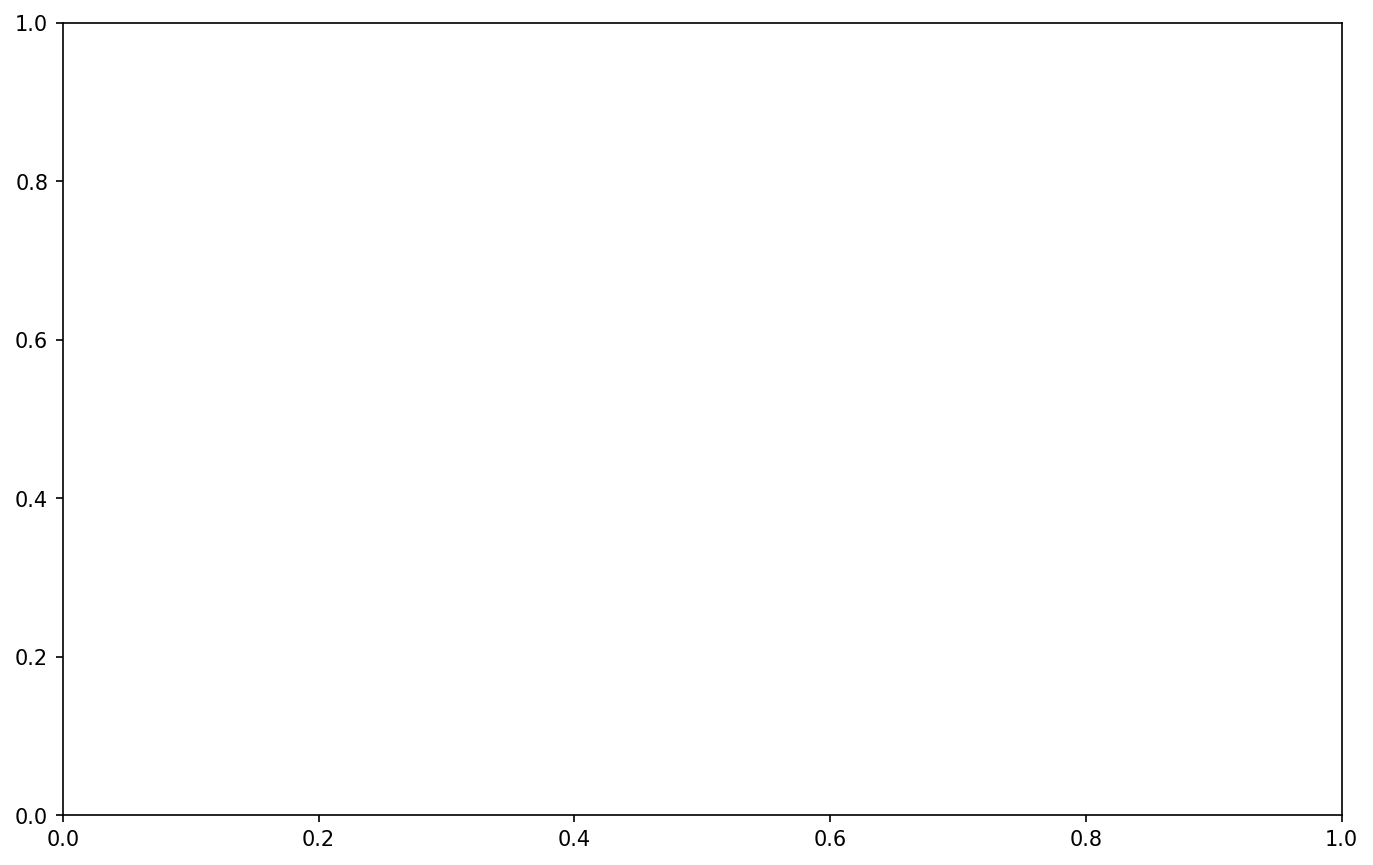

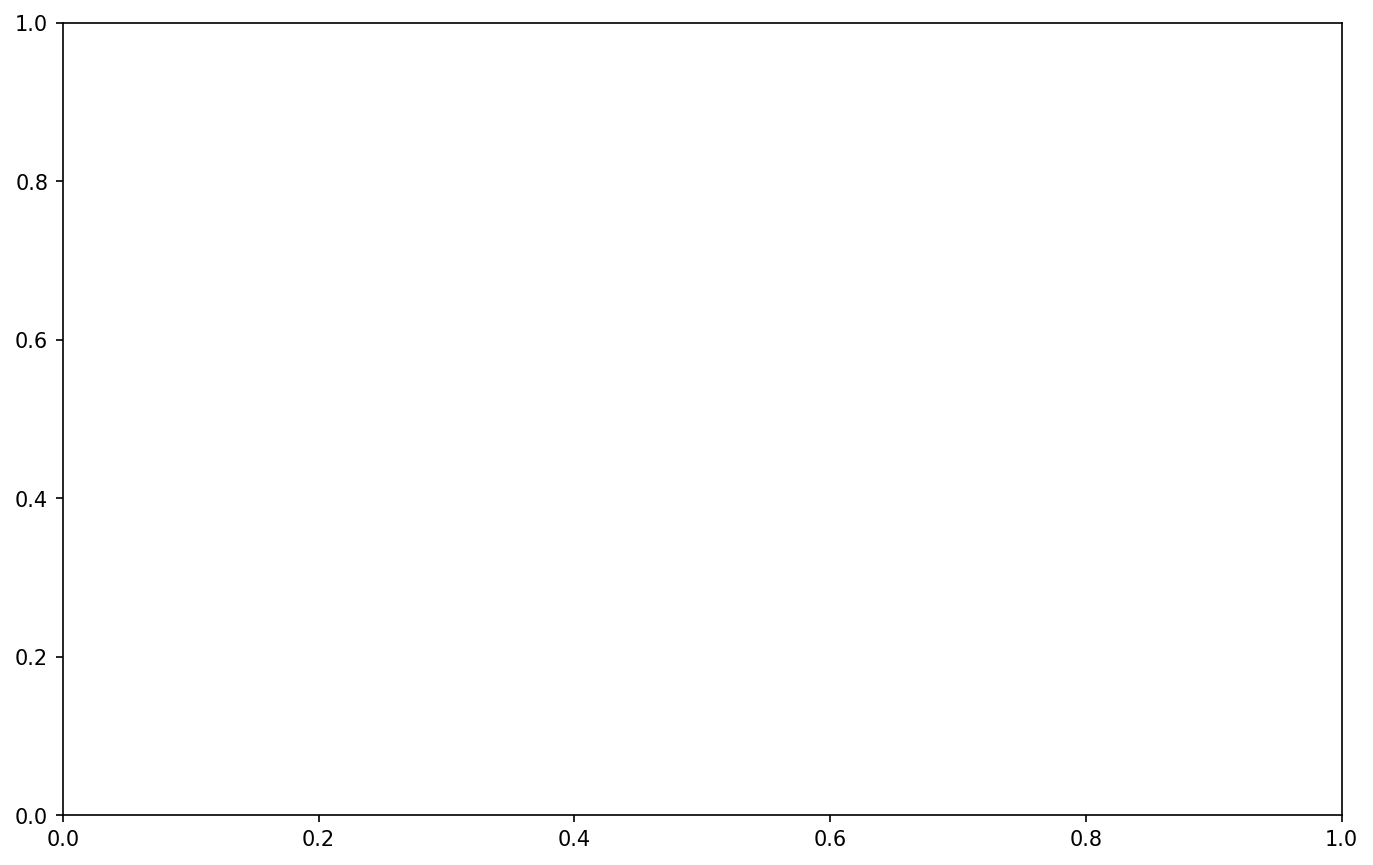

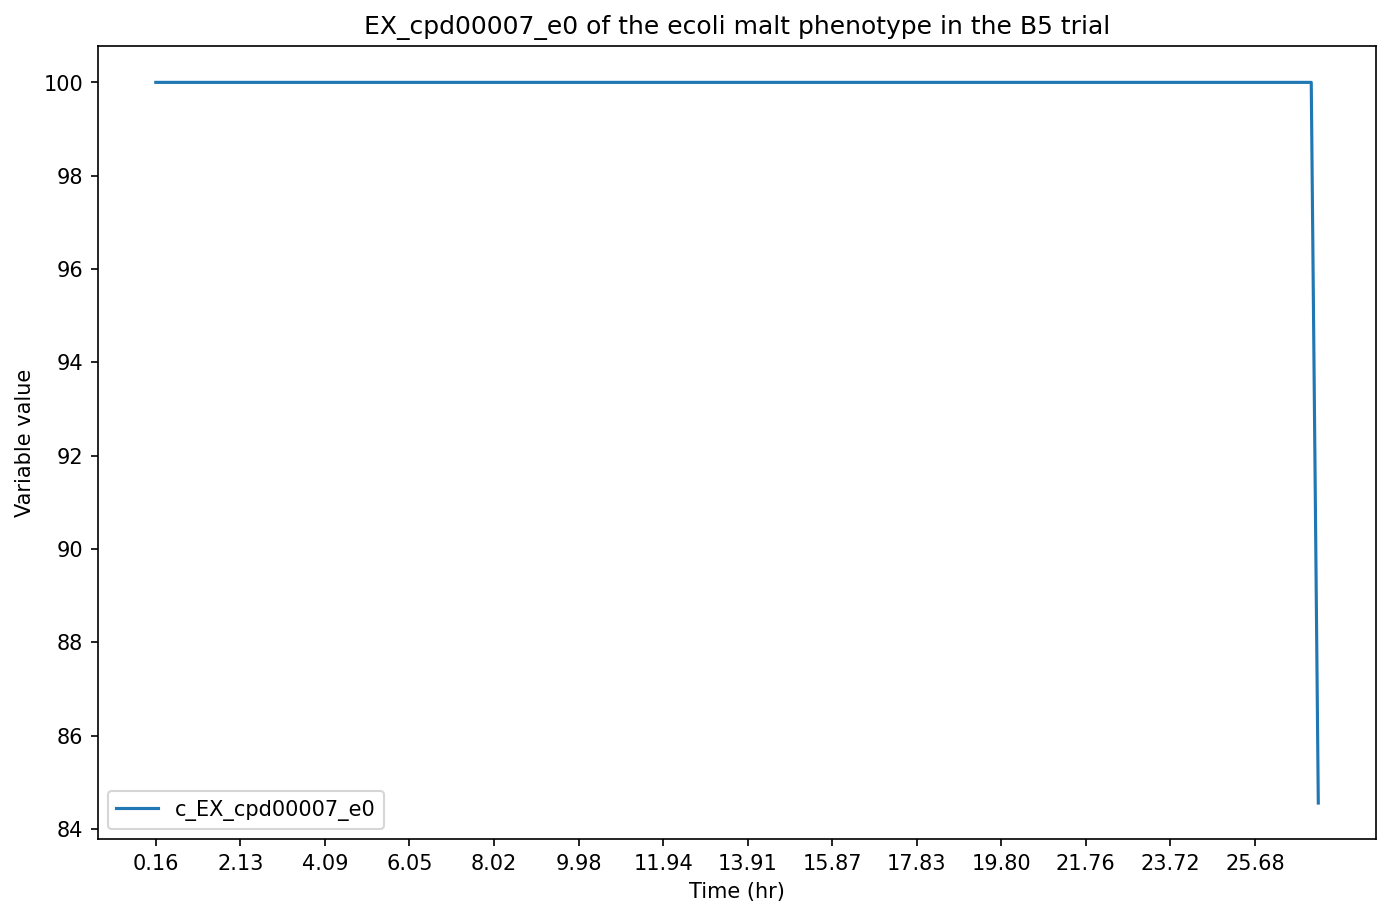

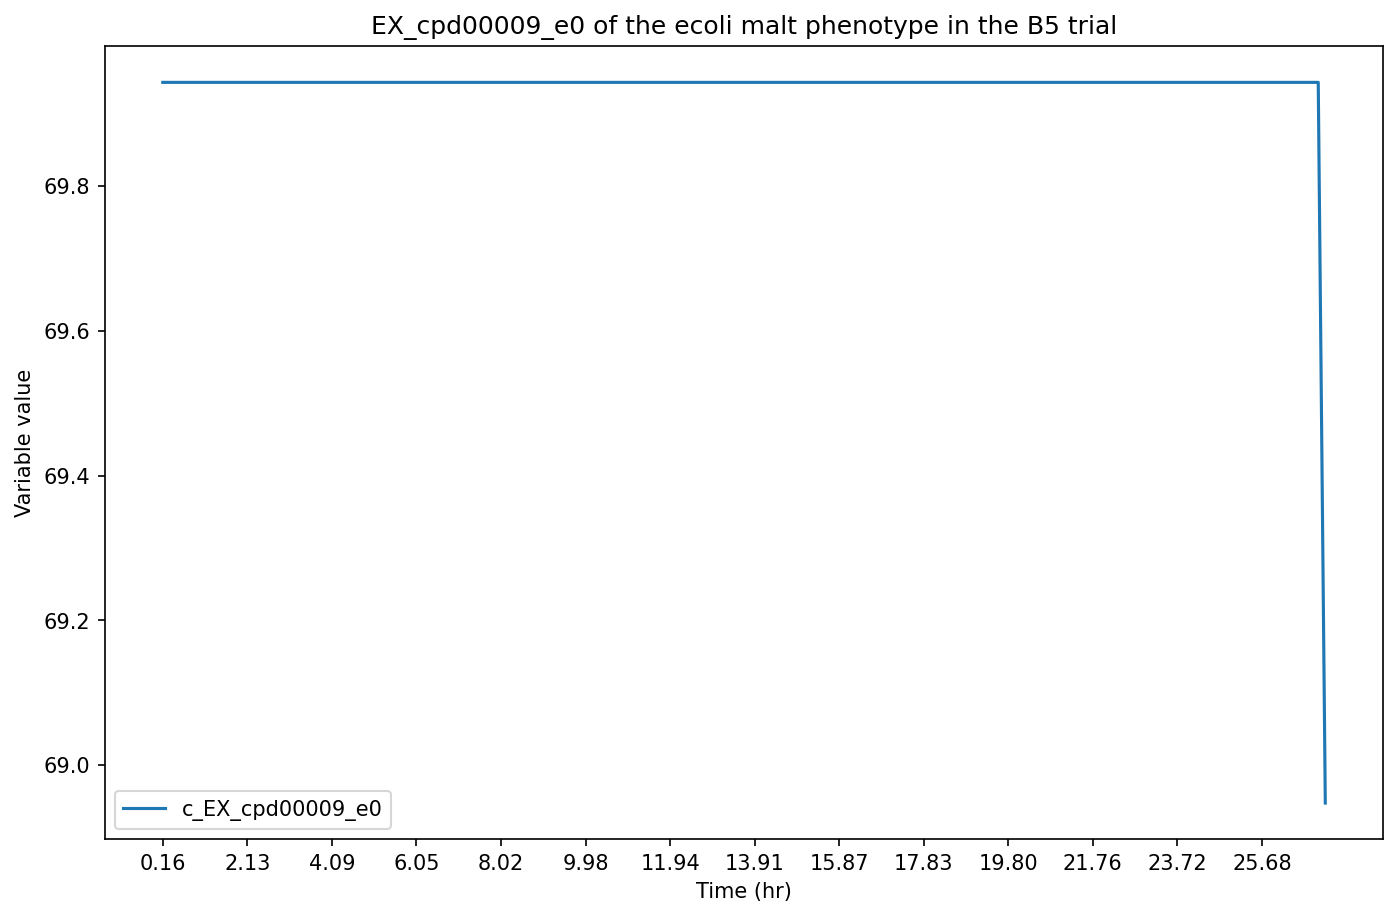

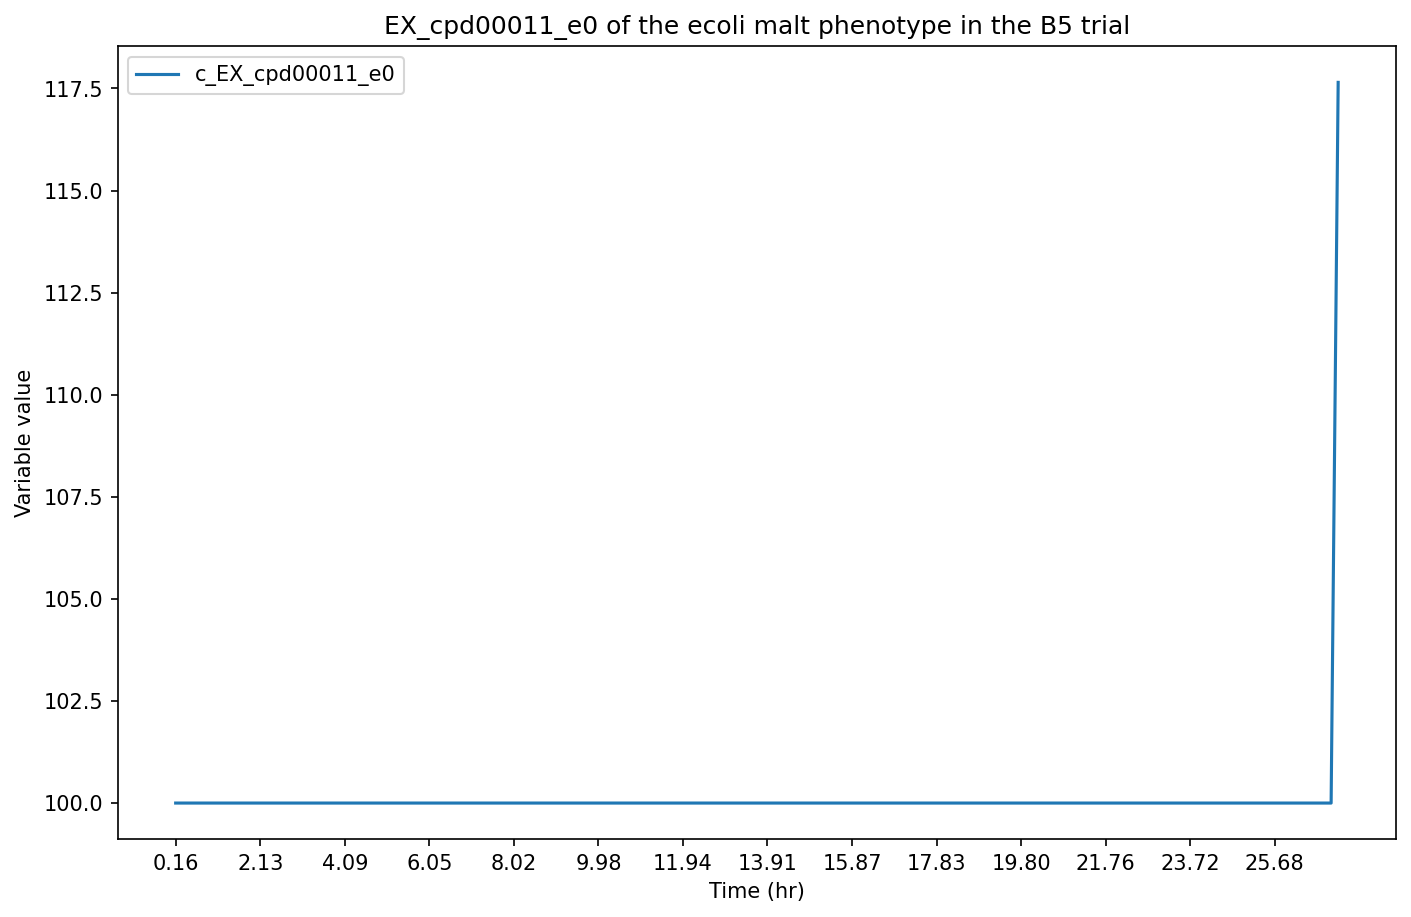

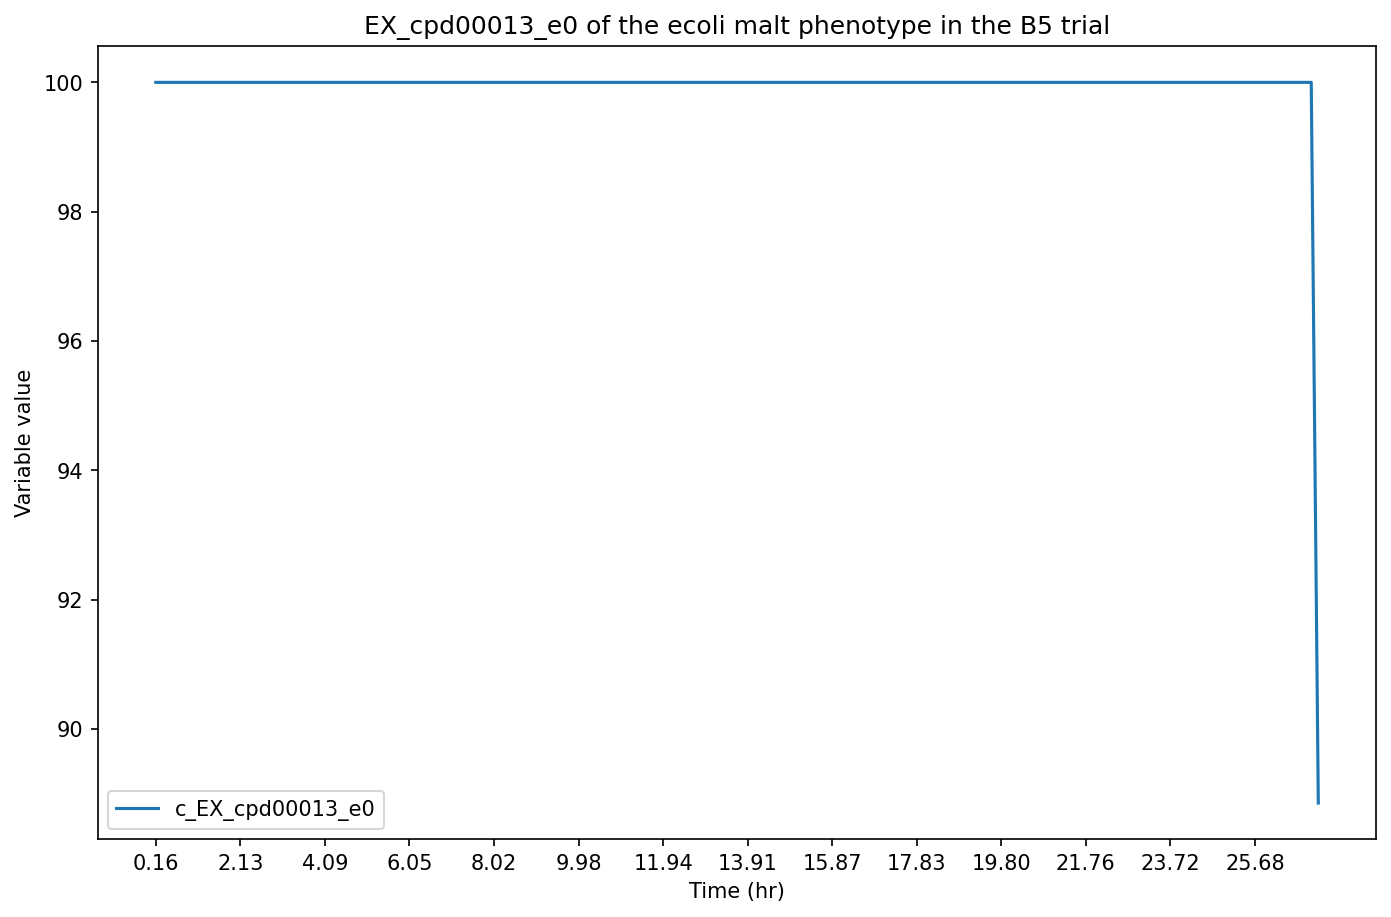

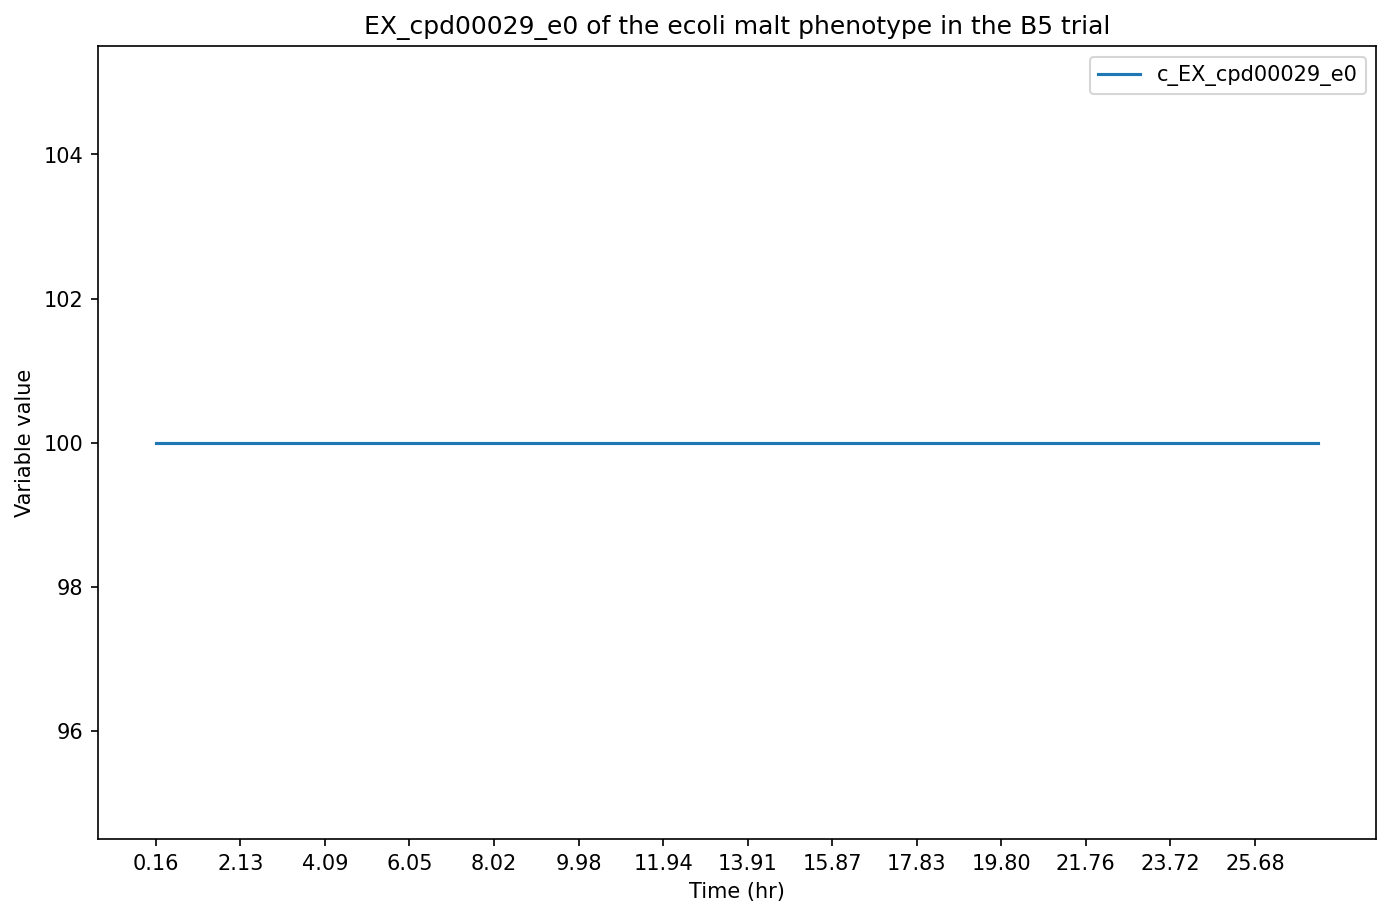

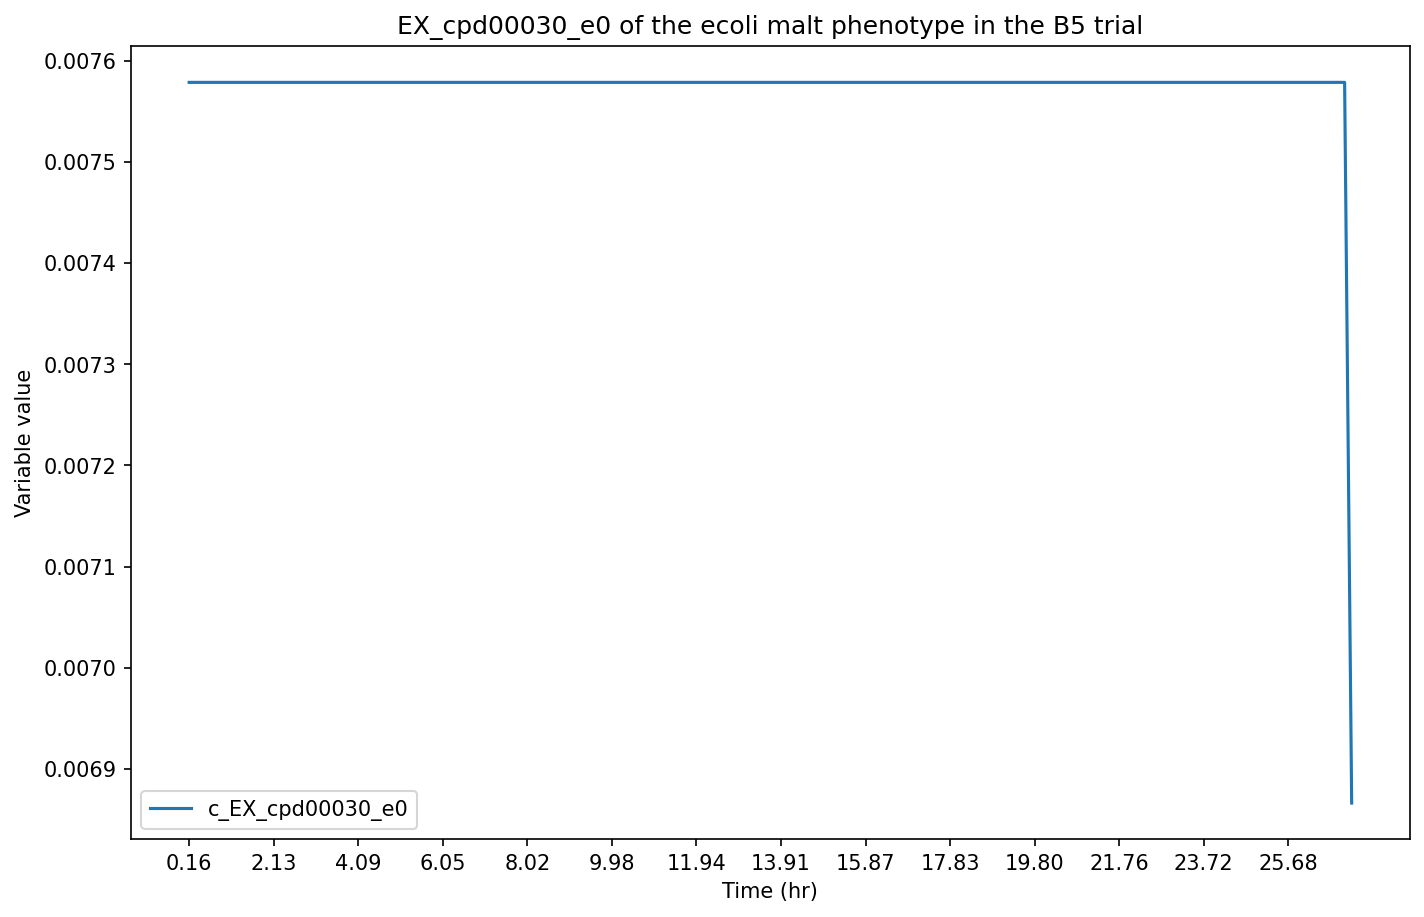

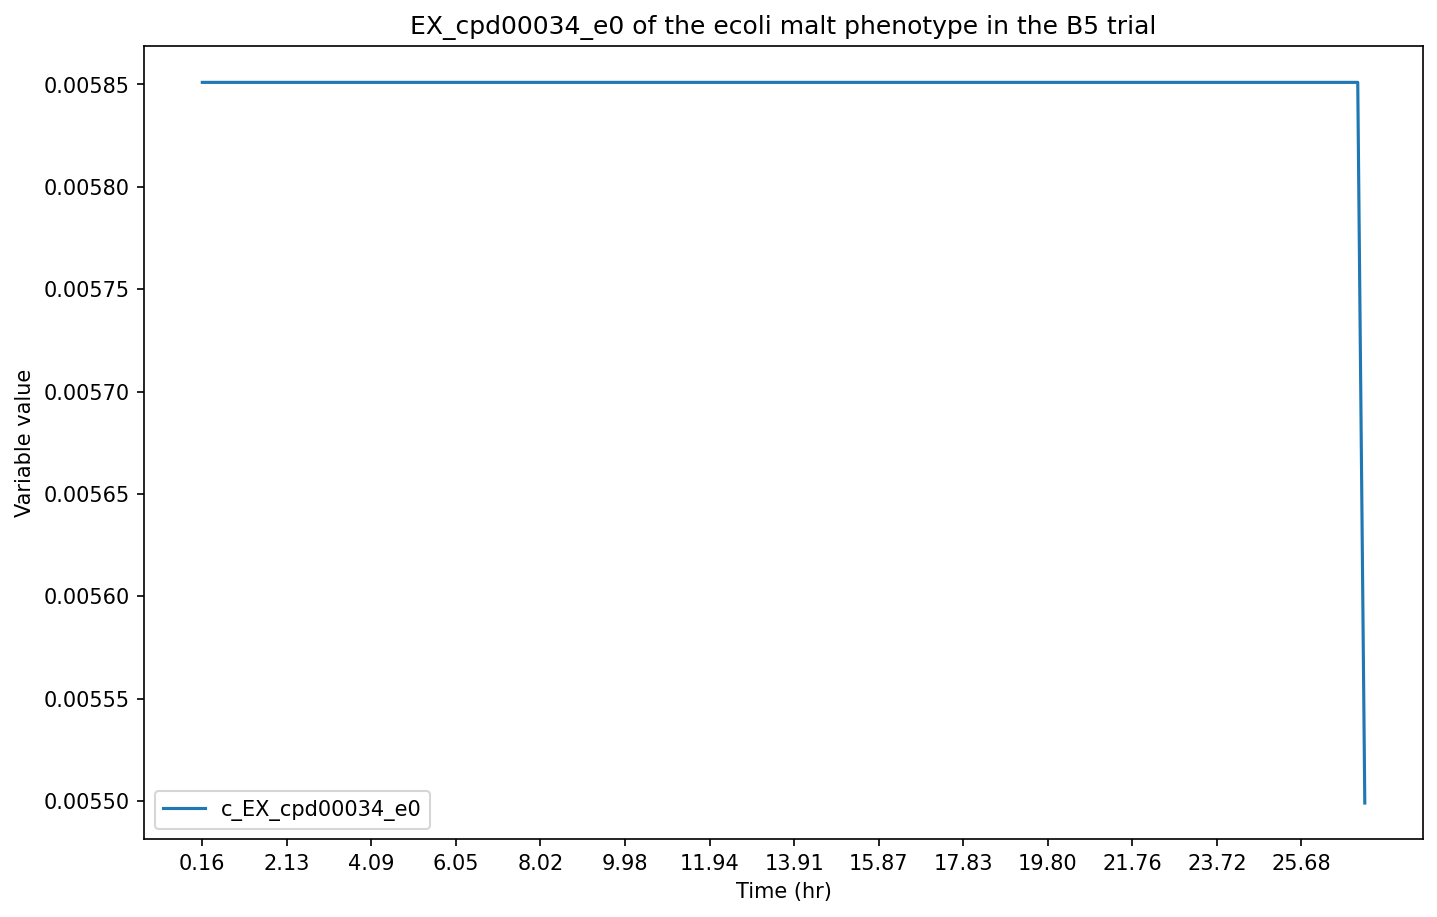

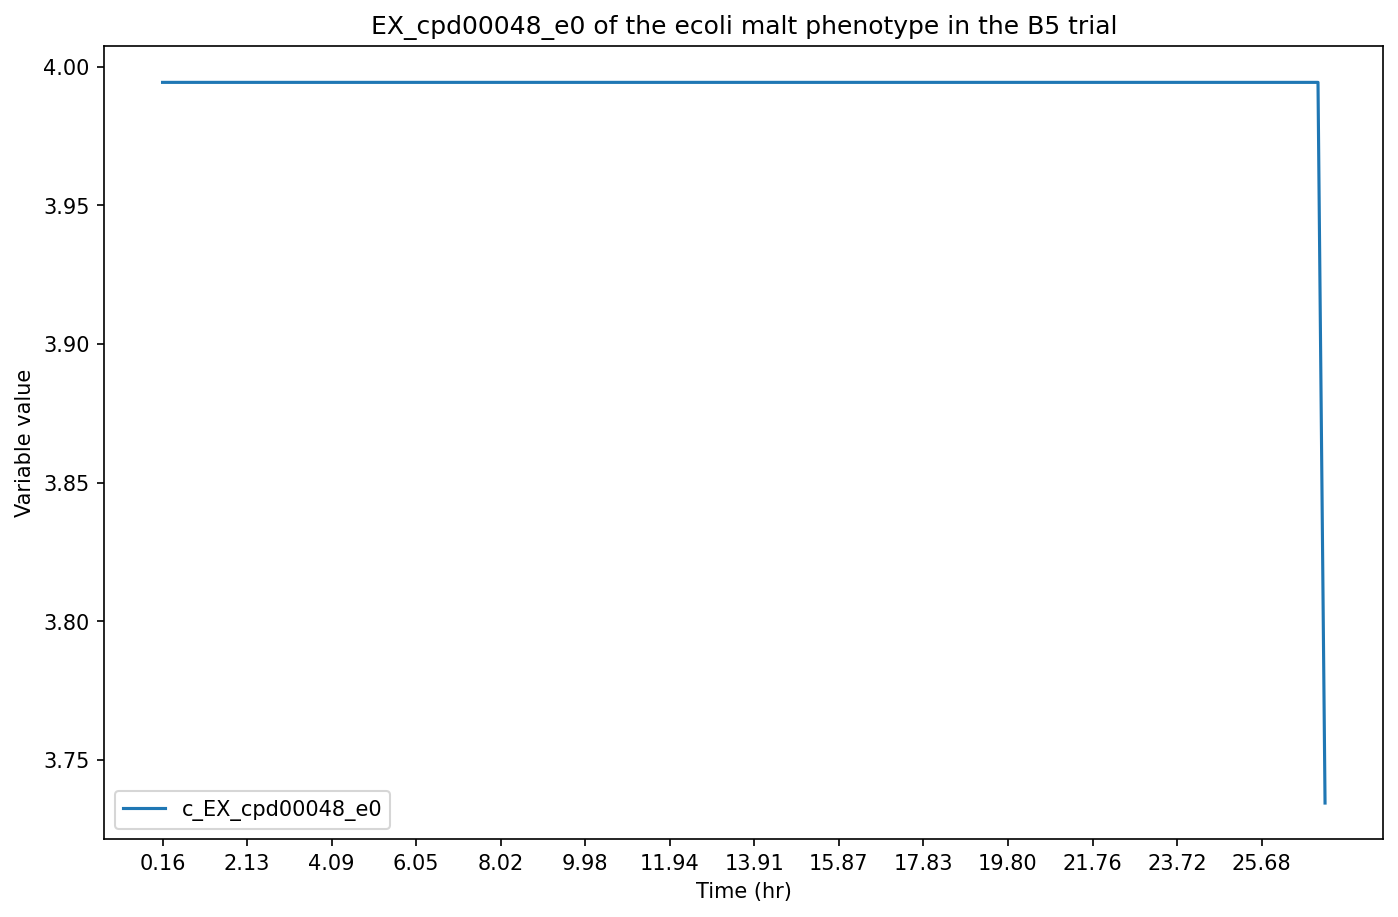

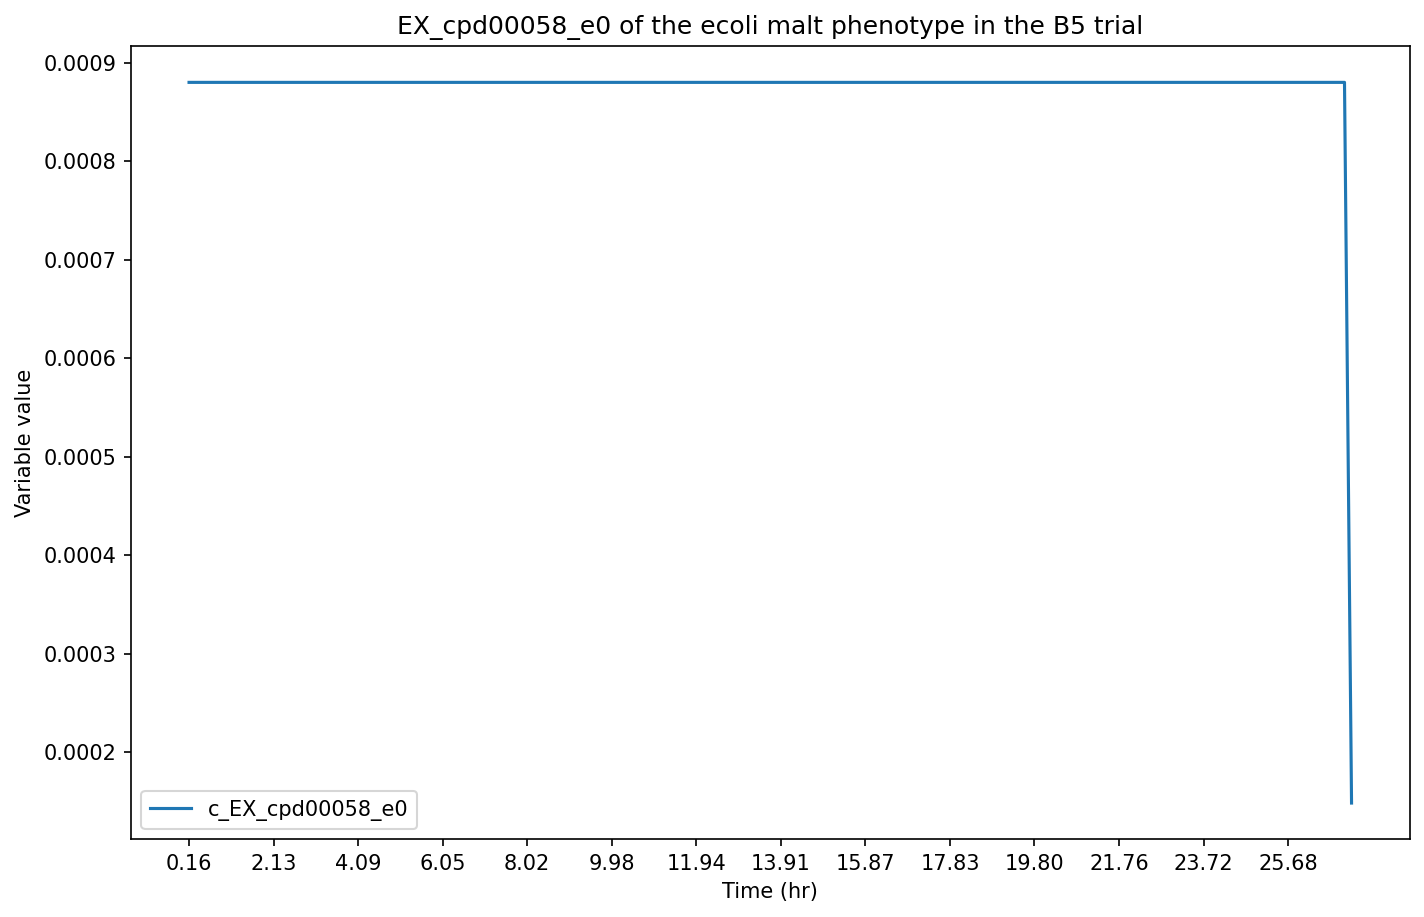

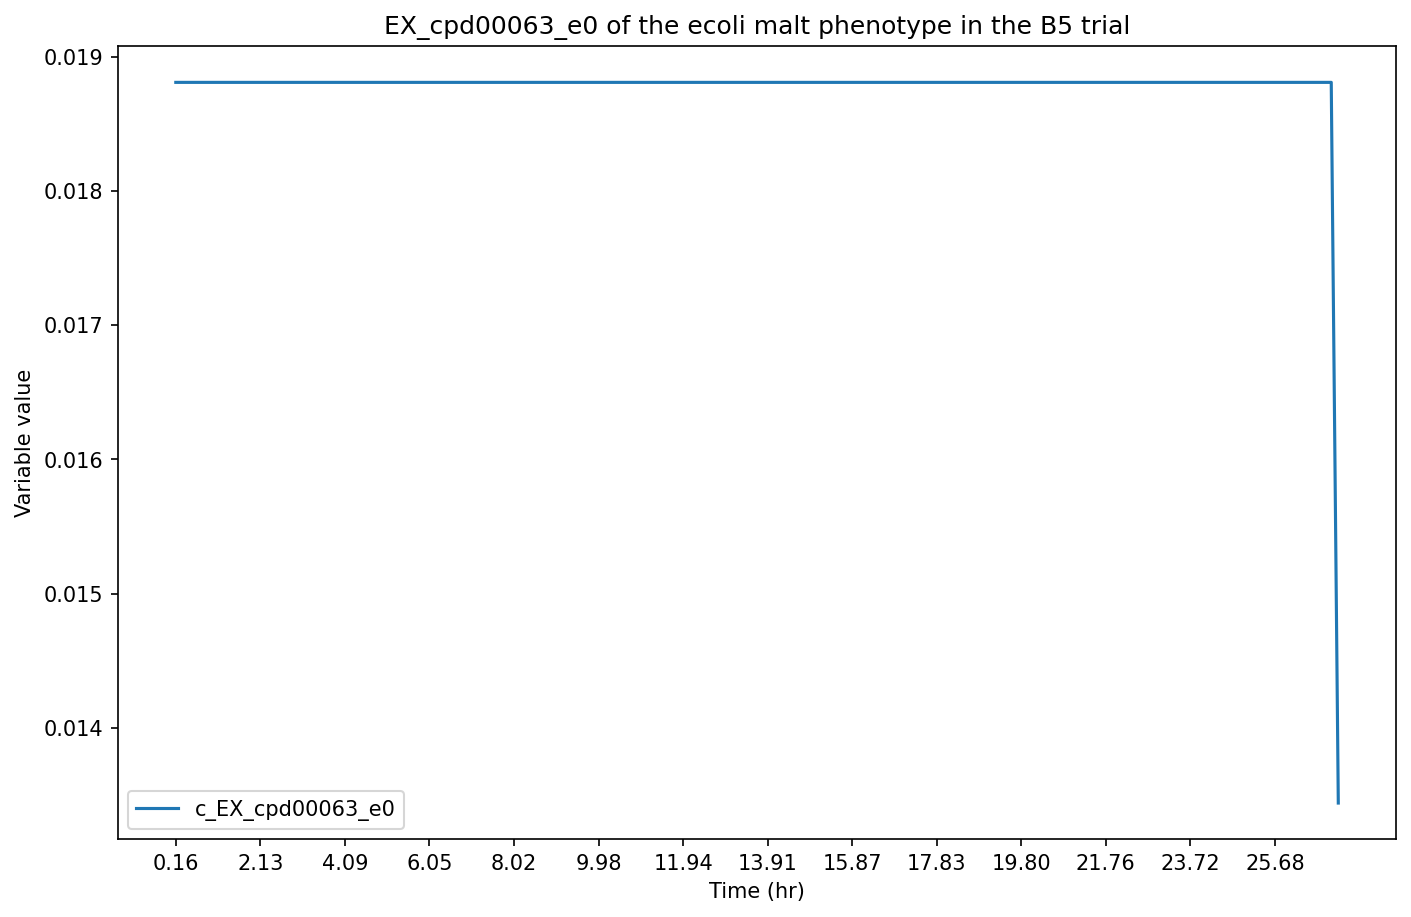

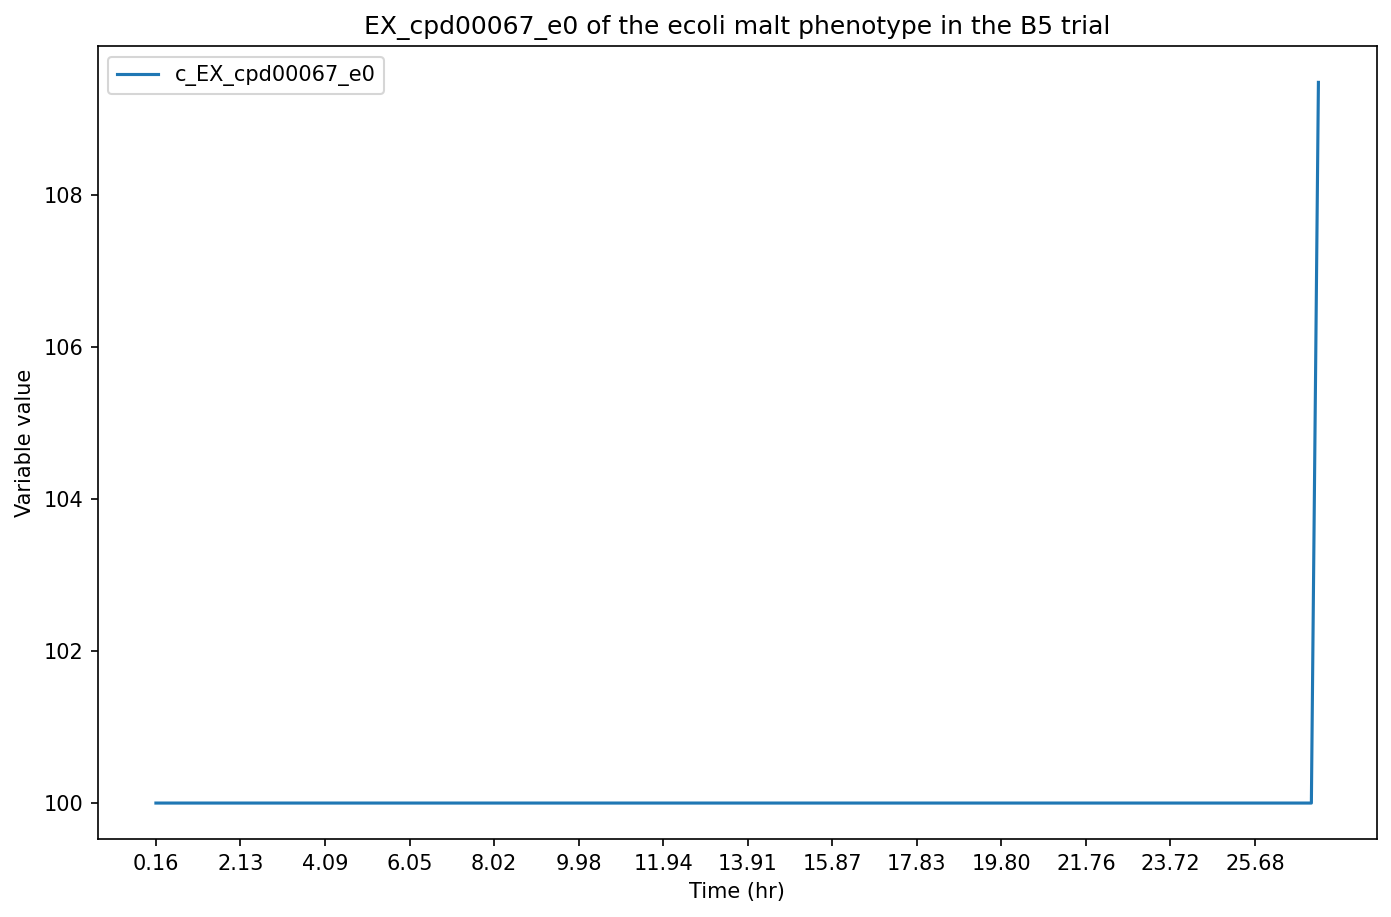

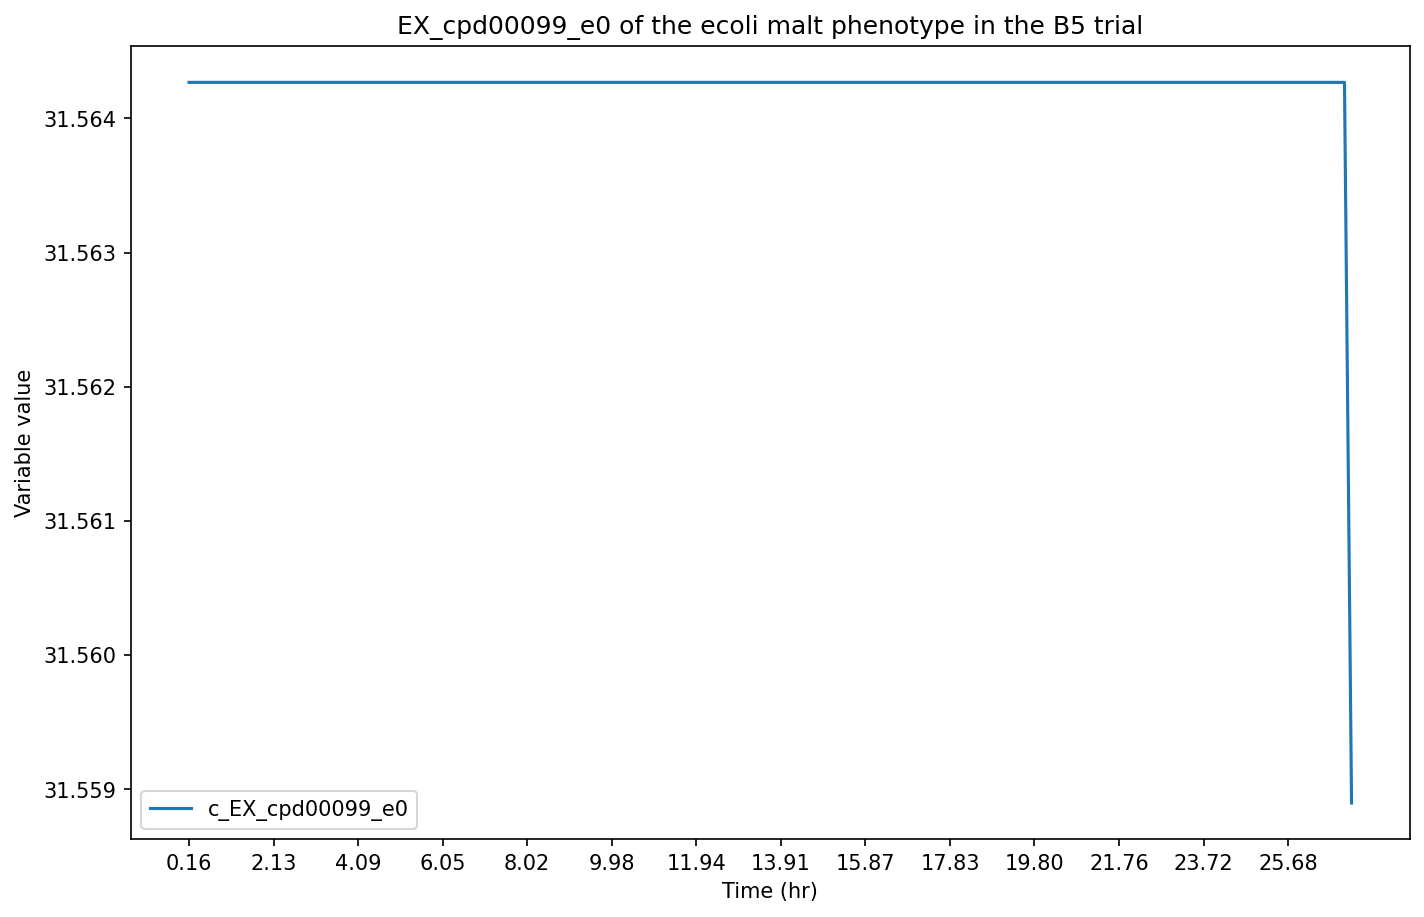

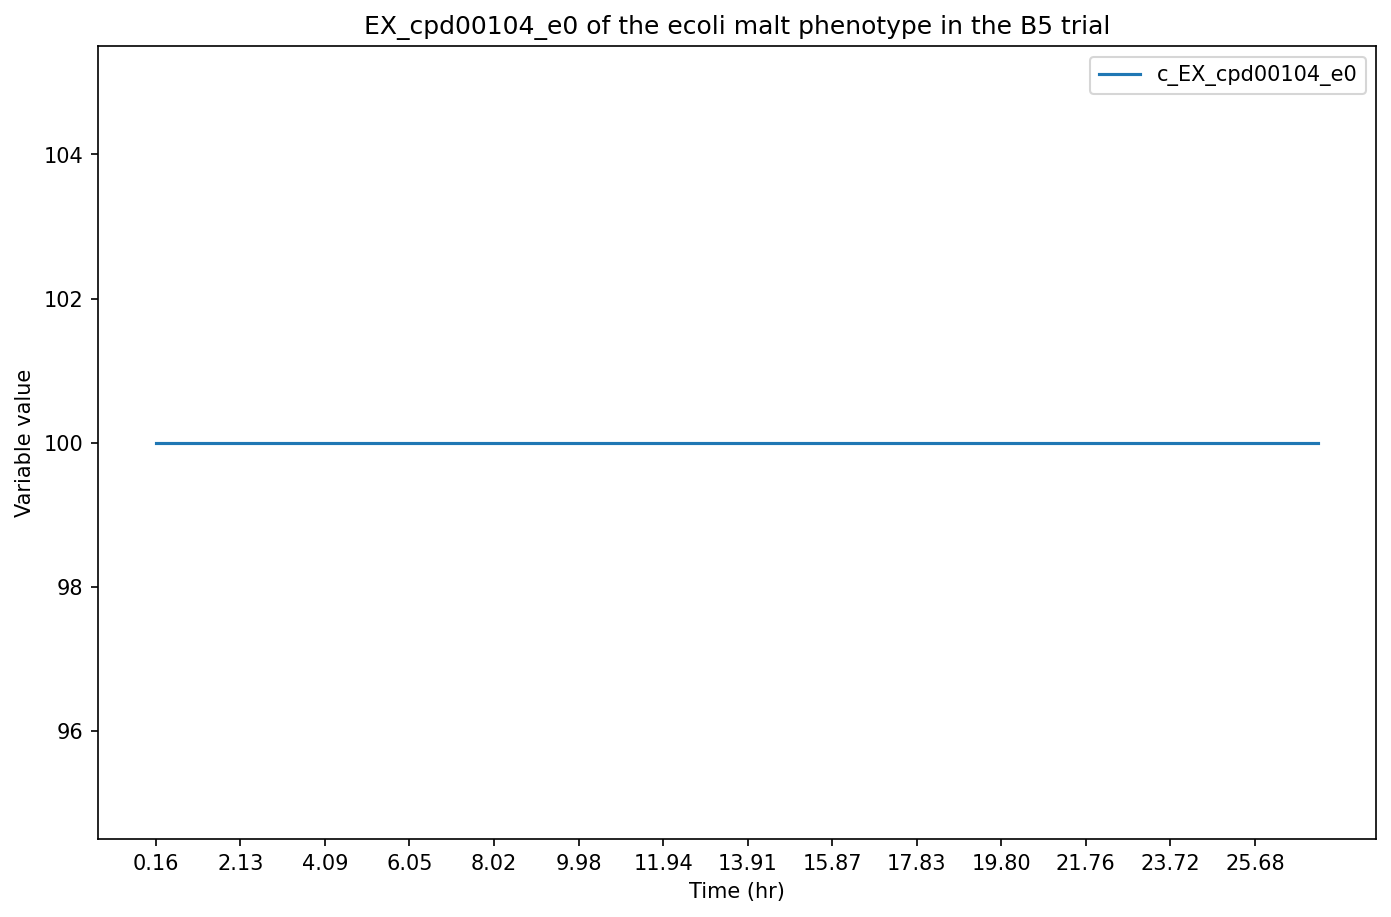

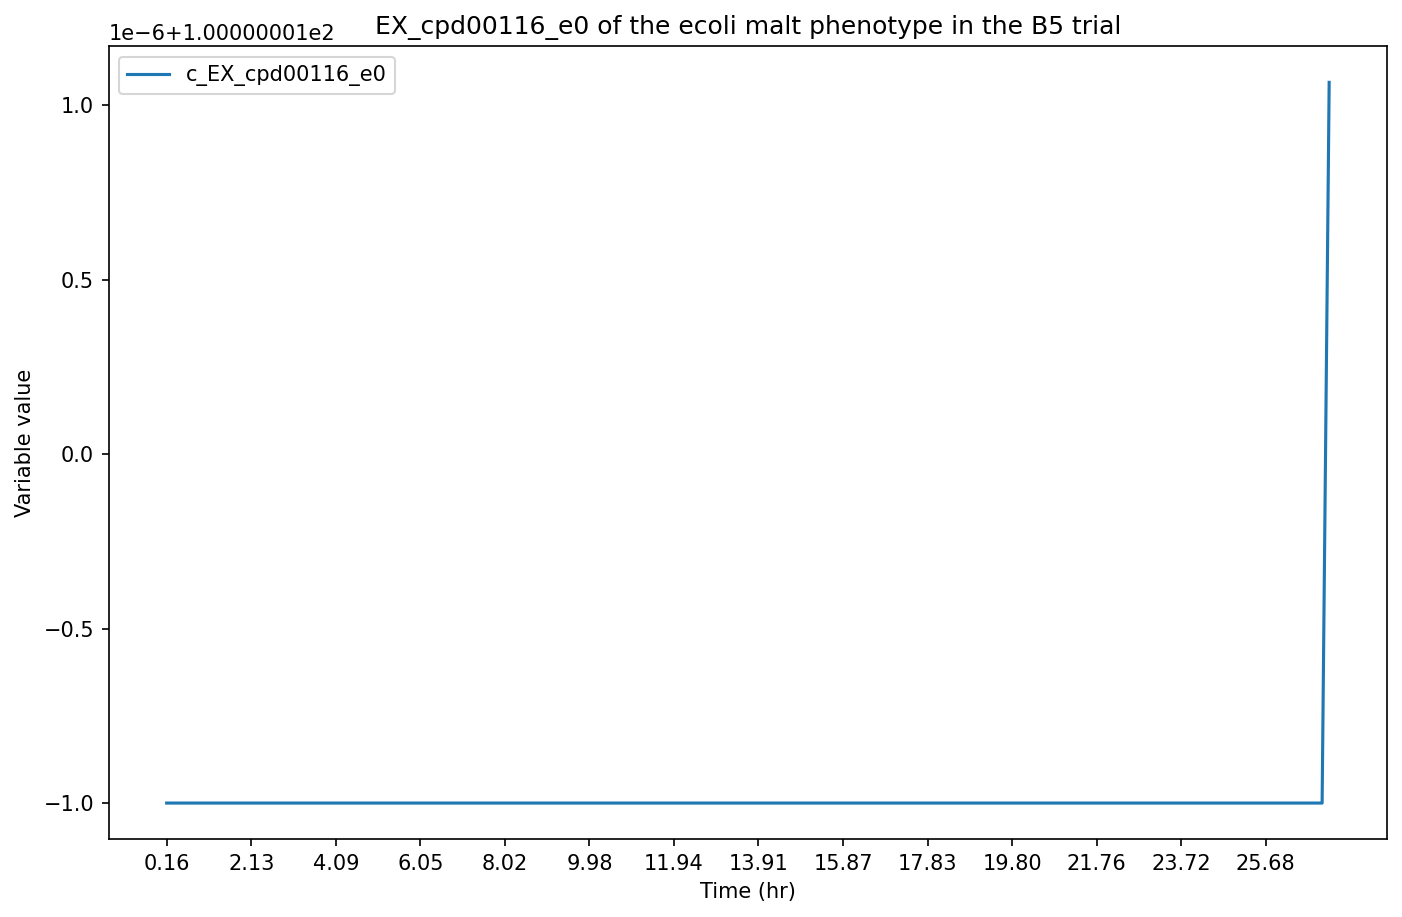

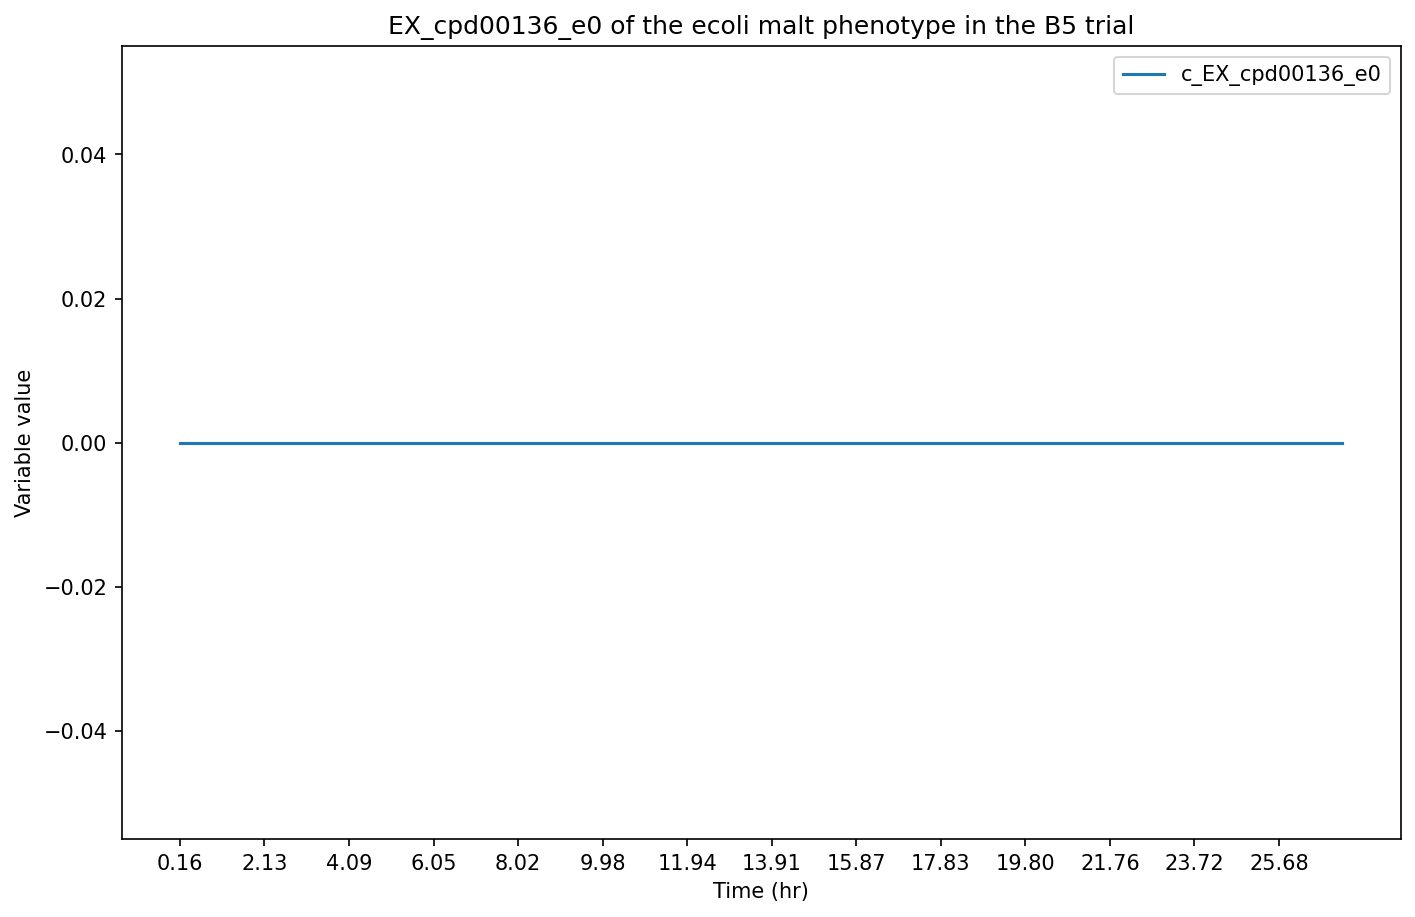

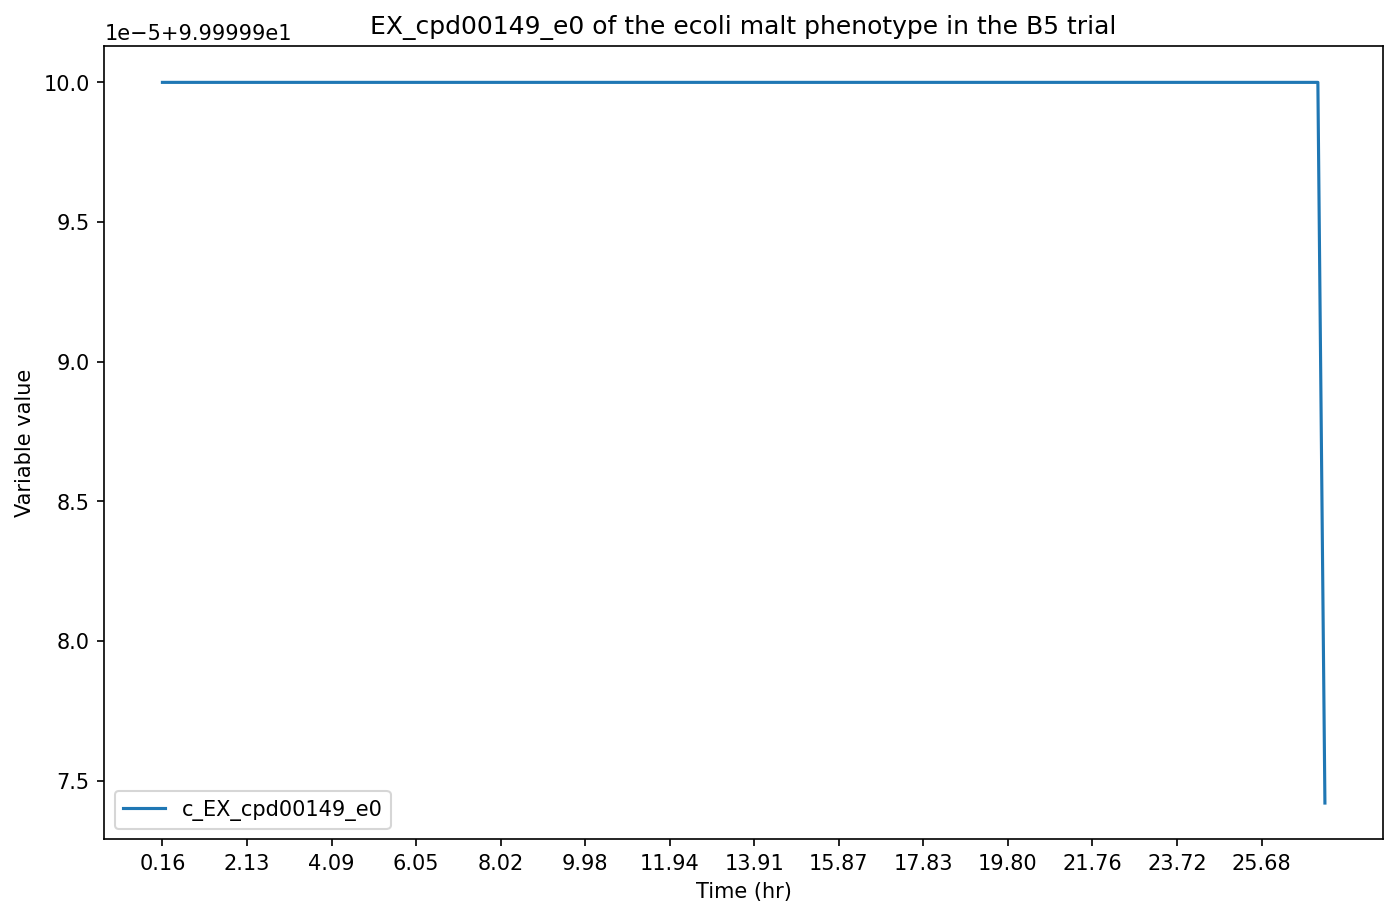

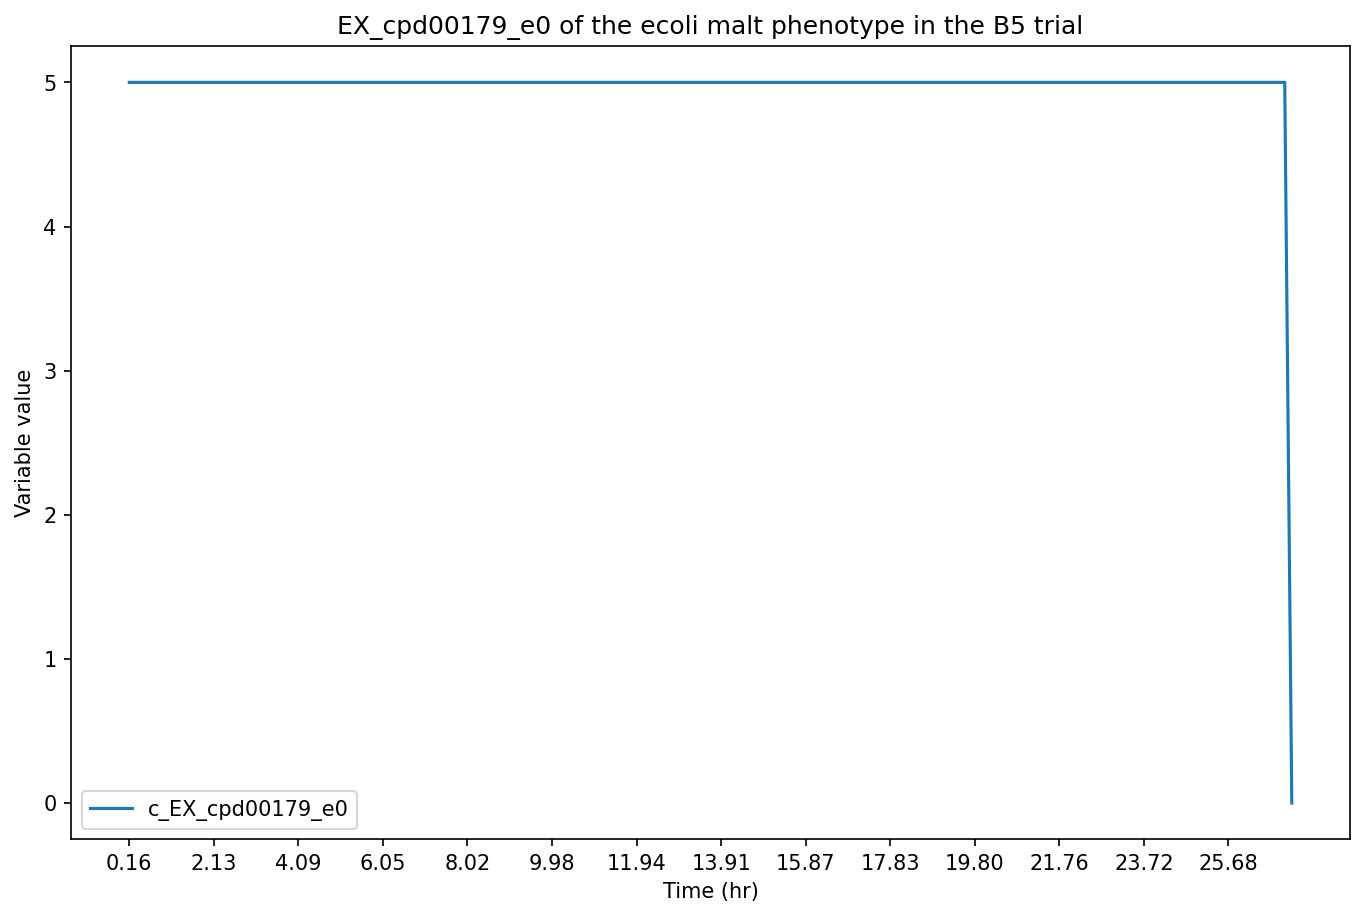

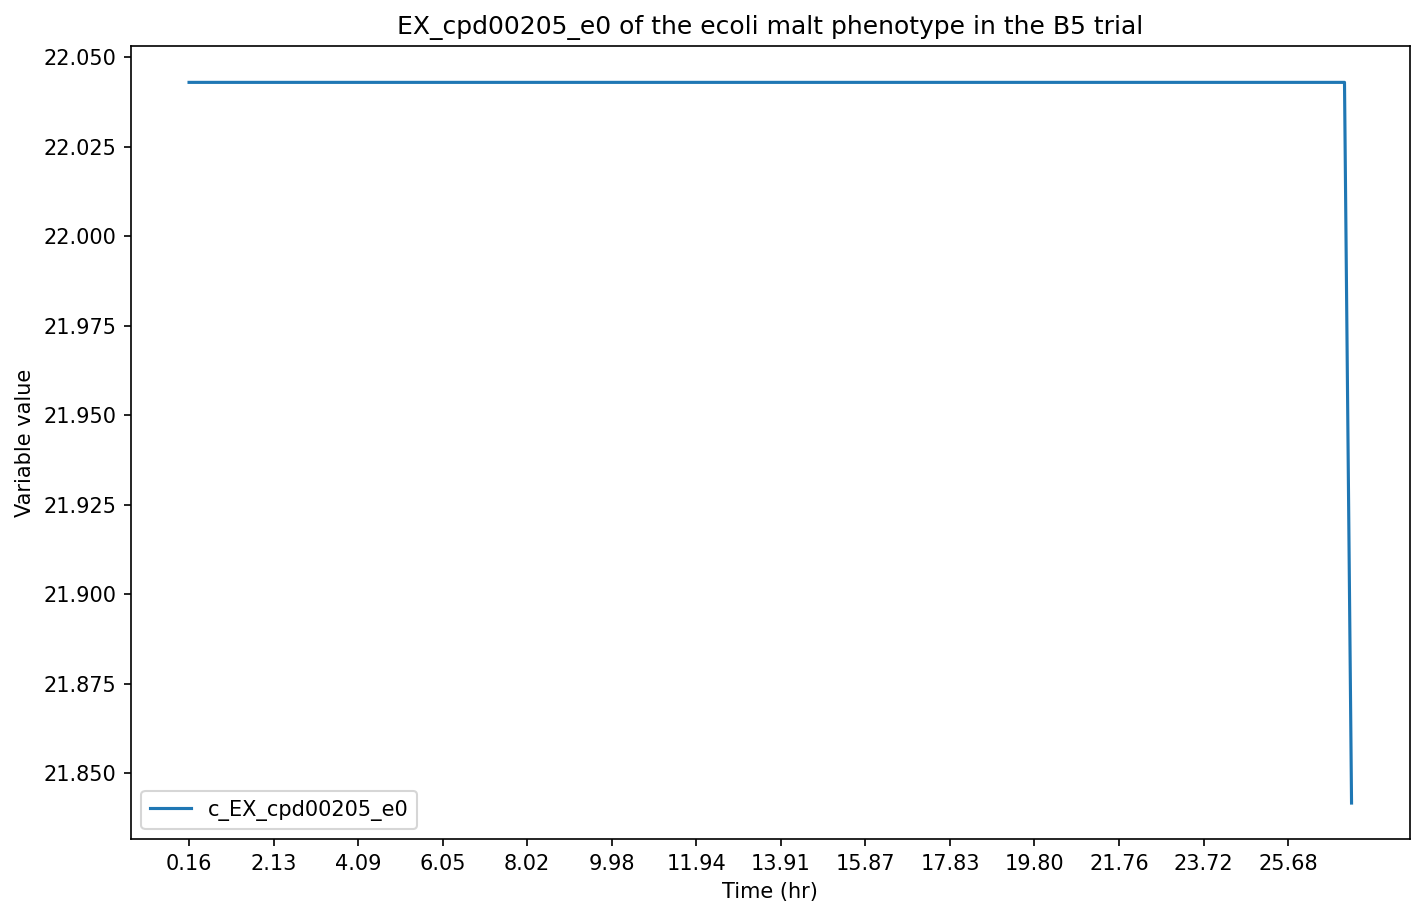

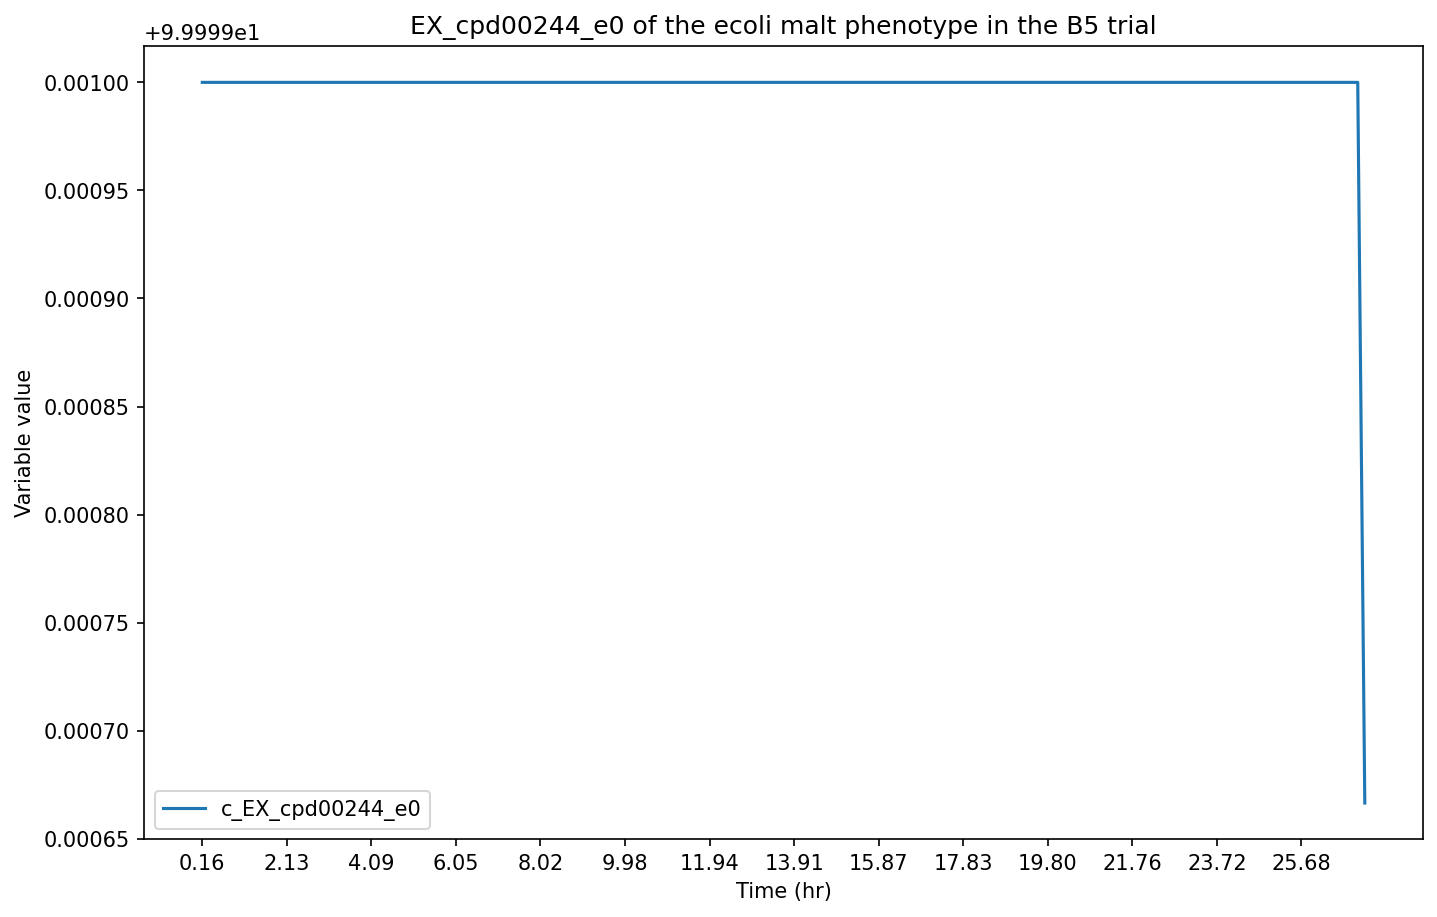

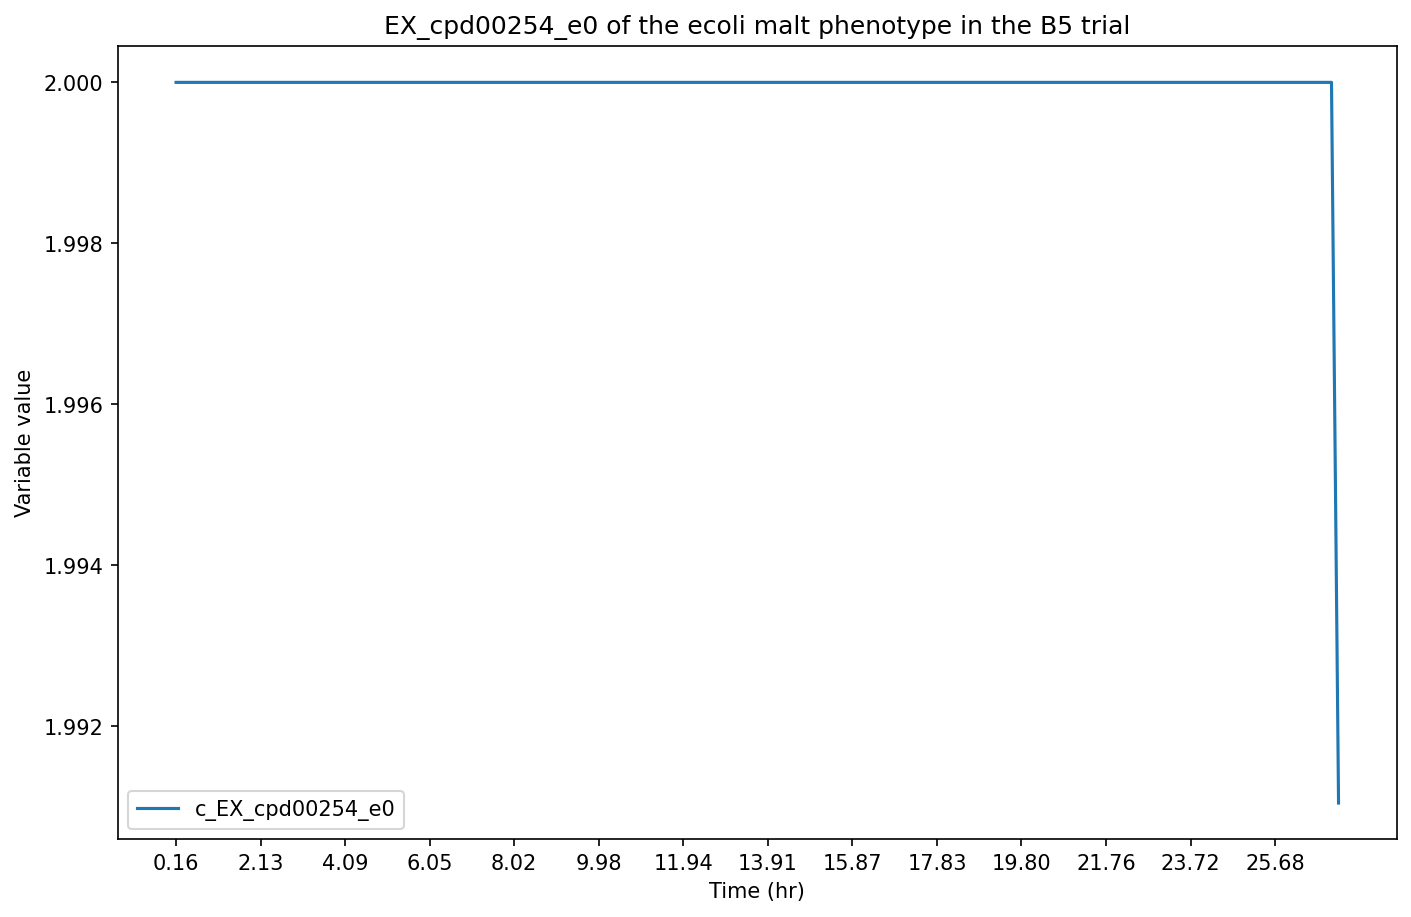

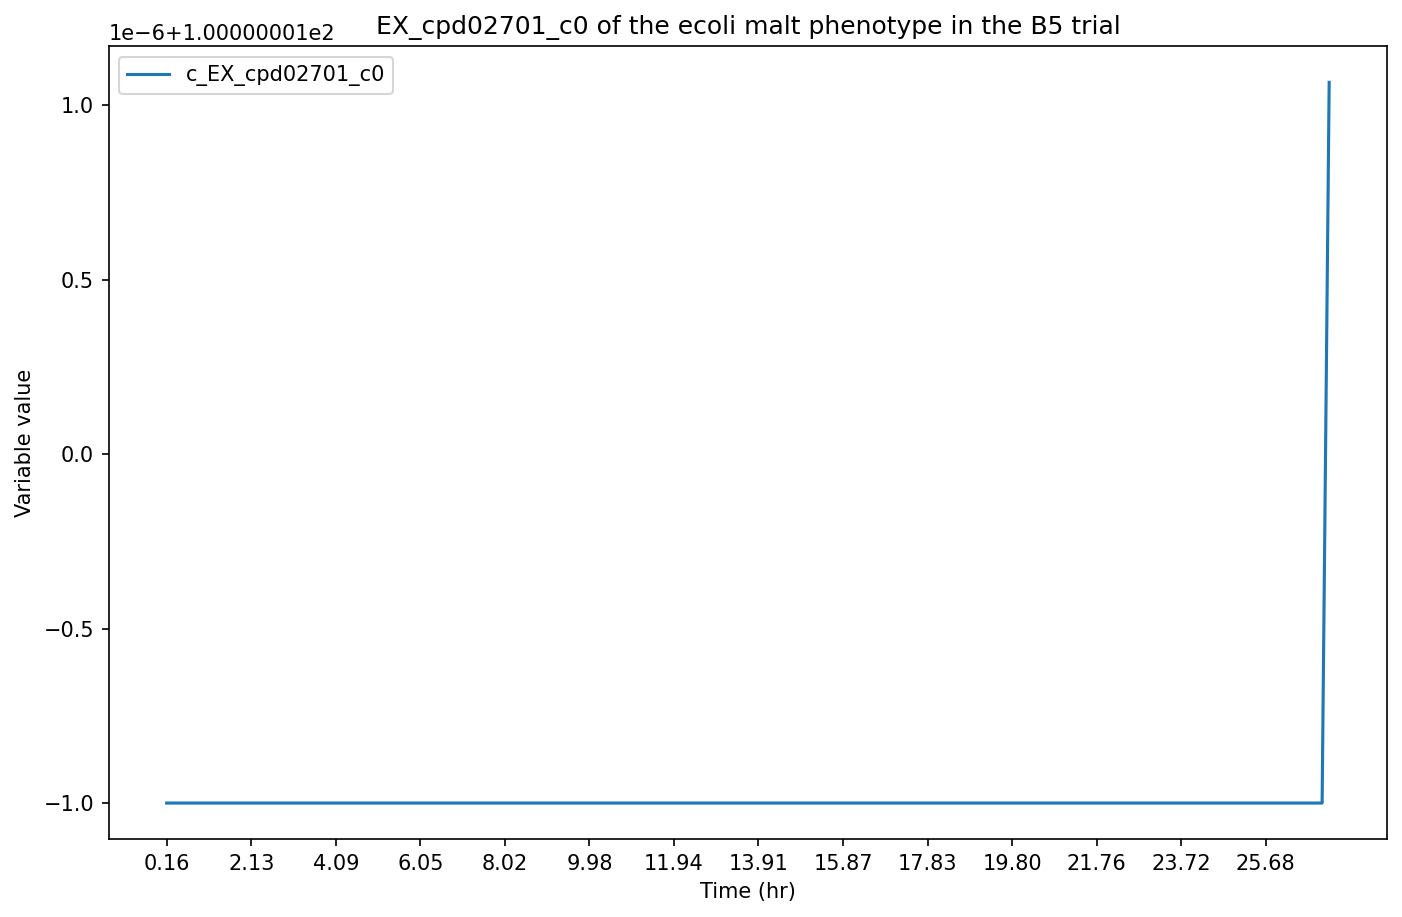

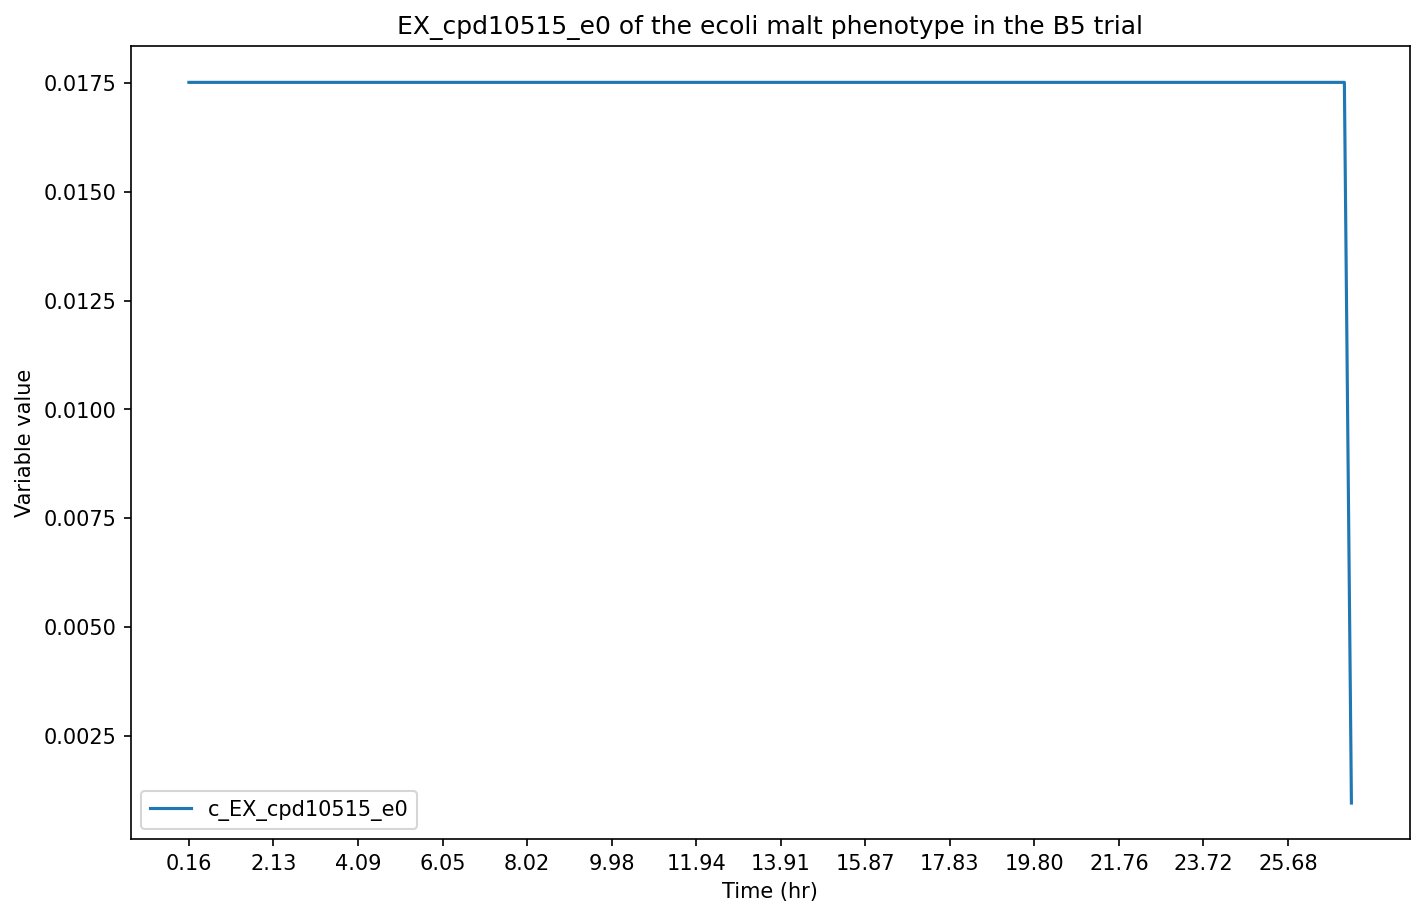

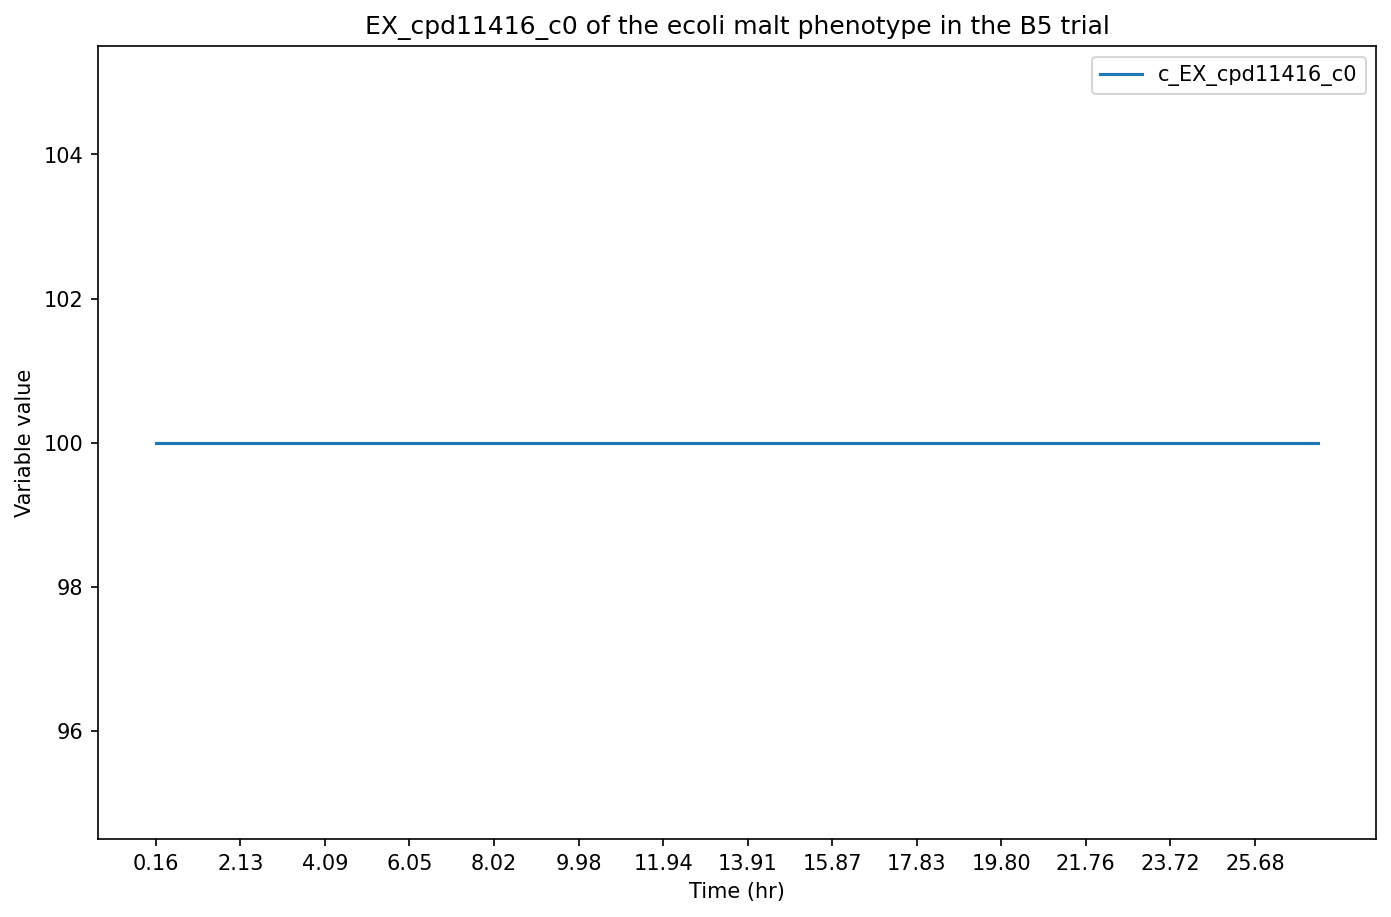

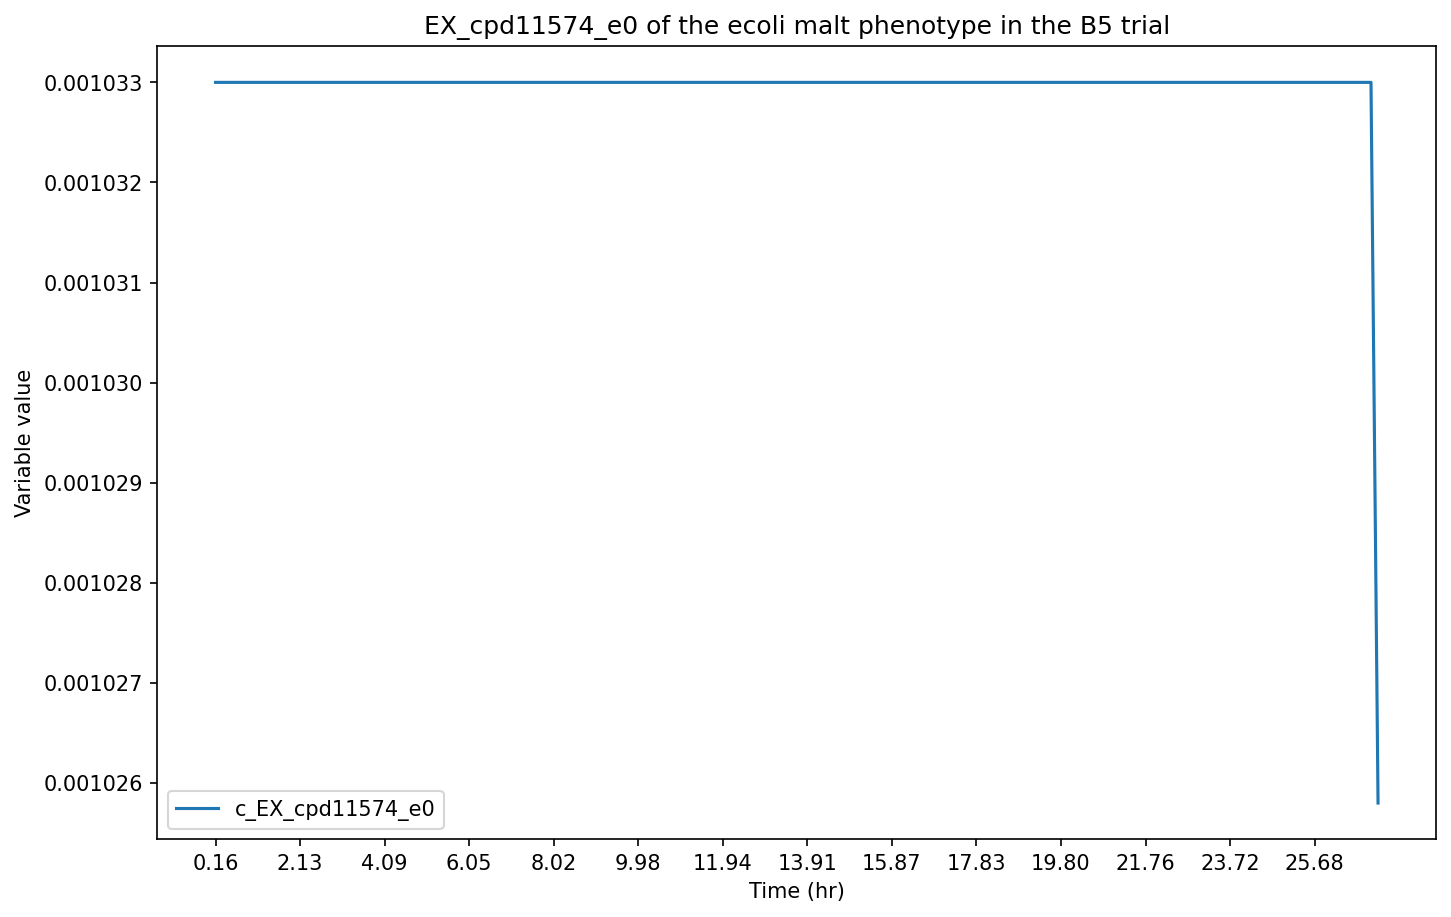

In [2]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
# from mscommfitting import MSCommFitting
# os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose')
%run ../mscommfitting.py
with ZipFile('msComFit.zip', 'r') as zp:
    zp.extractall()
fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
for metabolite in fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B5',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           unzip_contents='msComFit.zip', zip_name='full_community.zip')
print(datetime.today())
mscommfit2.define_problem(parameters={
    'v':100,
    'cvmin': 0.5,
    'bcv': 0.5
    }, zip_contents=True)
print(datetime.today())
%time mscommfit2.compute(graphs, 'full_community.zip')
print(datetime.today())
print('growth:', mscommfit2.parameters['v'], 'objective value:', mscommfit2.problem.objective.value, '\n\n\n\n')